# Linear Regression (and Classification) - The Red Wine Dataset
by [Sonjoy Das, PhD](https://www.linkedin.com/in/sonjoy-das-9b323213/)

This work will focus on Linear Regression for The Red Wine Dataset! In addition, we will do a little bit of classification as well, but the main focus is linear regression.

Jupiter Notebook and Python will be used to apply the knowledge of probability and statistics; see, for example, the book **The Art of Statistics** (hereinafter *AoS*) by Professor Spiegelhalter for the details of probability and statistics that we will be using. Specifically, regression analysis, a method discussed in Chapter 5 of *AoS*, will be the primary focus here. But, of course, other statistical concepts, such as training and testing, will be applied as well. So, other chapters of *AoS* would also be useful. We will also be using a few other statistical concepts and some classification algorithms that are not discussed in *AoS*. So, we will refer to apprpriate articles and documents for those addittional materials.

The first and foremost objective of this work is to use ***exploratory data analysis (EDA)*** to understand the data as much as possible. This EDA will be followed by the ***classical linear regression to predict an important feature (in particular, fixed acidity) in wine*** with a linear regression model that is as accurate as possible. Second, we will construct a ***multioutput linear regression*** model and 4 classifier models (two Oridinal regression models, k-nearest neighbors classifier, and  support vector classification model) to **predict the most important feature (quality of the wine) which is discrete-valued**.

For the classical linear regression analysis, we'll try first a *univariate* analysis involving a single explanatory variable, and then consider a *multivariate* one involving multiple explanatory variables to predict the real-valued feature (fixed acidity). We'll iterate together towards a decent regression model before considering the multioutput linear regression model and the classifiers for prediction of the discrete-valued feature (quality scores of wine). One of the main objectives of this notebook is to see how the EDA helps to get some insight/understanding of the problem in hand, and how in that process the regression models & classification models unfold.

Throughout this work, we will use **self-explanatory comments** and form **questions** along with their answers to describe the work carried out. As we progress through the notebook, the entire essence of the work will become clear slowly. We will do a bit of research with Google, stackoverflow, relevant documentations and other basic resources available online to come up with answers for some of the questions and to figure out how to implement any specific pythonic steps. 

In this work, our dataset is the red wine dataset which is available through the file,`wineQualityReds.csv`.

The project will be based on the entire data science pipeline and has the following structure:

**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data
- Choosing a dependent variable
 
**2. Cleaning, transforming, and visualizing correlations**
   
**3. Modeling: Prediction of `fixed.acidity`**
- Train/Test split
- First linear regression model: `scikit-learn` and one input variable
    + Input variable `density`
    + Custom function to automate ML modeling steps
    + Input variable `citric.acid`
    + Input variable `pH`
- Second linear regression model: `statsmodels` and only `density` as input variable 
- Third linear regression model: Multiple linear regression
- Fourth linear regression model: Multiple linear regression -- attempt to avoid redundancy
- Fifth linear regression model: Multiple linear regression -- avoiding *useless* redundancy

**4. Multiple linear regression with `quality` as input categorical feature: Prediction of `fixed.acidity`**

**5. Conclusions so far & Next steps** 
- Reflection 
- Which model was best?
- Other regression algorithms

**6. Multioutput linear regression and Classifications: `quality` as target variable**
- Multioutput linear regression based on Dummy/Indicator variables
- Ordinal regression
    + Probit ordinal regression
    + Logit ordinal regression
- k-nearest neighbors (k-NN) classifier
- Support vector machines (SVM): C-Support vector classification
- Comparison of results and Remarks


## 1. Sourcing and loading

In [1]:
# Print the Python version being used
from platform import python_version
print(python_version())

3.9.0


### 1a. Import relevant libraries 

In [2]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For most of our visualization needs.

# The statsmodels API focuses on models and the most frequently used statistical test,
# and tools, e.g., Regression, Generalized Linear Models, Multivariate Models, etc. See
# this link (https://www.statsmodels.org/stable/api.html) for more details.
import statsmodels.api as sm

# statsmodels.graphics.regressionplots.abline_plot
# It is used to plot a line given an intercept and slope.
from statsmodels.graphics.api import abline_plot

# 1. The following function "mean_squared_error" in sklearn.metrics module computes 
# the mean squared error regression loss.
# Sources: a. https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
#          b. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#          c. https://en.wikipedia.org/wiki/Mean_squared_error
# 2. The following function "r2_score" in sklearn.metrics computes the coefficient of 
# determination regression score. This represents the proportion of the variation in the 
# dependent variable that is predictable from the independent variable(s).
# Sources: a. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html 
#          b. https://en.wikipedia.org/wiki/Coefficient_of_determination.
from sklearn.metrics import mean_squared_error, r2_score

# The following function "train_test_split" in sklearn model selection splits arrays or 
# matrices into random train and test subsets. Two most important imput parameters are
# "test_size" and "random_state". For explanation and details, see the link:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# The "linear_model" module in sklearn provides access to a whole suite of functions. 
# See documentation https://scikit-learn.org/stable/modules/linear_model.html for more 
# details. In fact, you can also use "linear_model" module to implement nonlinear models
# by using appropriate transformation (see, for instance, "Polynomial regression: 
# extending linear models with basis functions" in the documentation).
# Here, we will only import the LinearRegression class.
from sklearn.linear_model import LinearRegression

# The sklearn.preprocessing package provides several common utility functions and 
# transformer classes to change raw feature vectors into a representation that is 
# more suitable for the downstream estimators. For instance, it provides function to 
# do standardization, mean removal and variance scaling, and non-parametric 
# transformations (to map the data to a uniform distribution, Gaussian distribution), 
# etc. For more details, see https://scikit-learn.org/stable/modules/preprocessing.html.
# Here, we will only import StandardScaler class since this is the scaling we will implement
# in this notebook, in particular, to scale the data, which will improve the predictive
# accuracy of 2 Ordinal regressions, kNN, and SVM models. We found that such scaling or 
# normalization of the data was not useful for linear regression analysis.
from sklearn.preprocessing import StandardScaler


# The following libraries are specifically for 4 classification models.

# To carry out ordinal regression
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Required for ordinal regression and multioutput regression model for discrete-valued target
from pandas.api.types import CategoricalDtype

# To use classifier implementing the k-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier

# To use Support vector machines (SVMs)'s supervised learning method for classification
from sklearn.svm import SVC # SVM's C-Support Vector Classification

# To plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1b. Load the data

Load the data by reading the comma-separated values (csv) file, `wineQualityReds.csv` into a DataFrame. See [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for syntax. Set the parameter `index_col = 0`, because the first column contains no useful data. 

In [3]:
wine_df = pd.read_csv('wineQualityReds.csv',index_col=0)

### 1c. Exploring the data

Let's check its dimension using `DataFrame.shape` which returns a tuple representing the dimensionality of the DataFrame. Check syntax [here](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html).

In [4]:
wine_df.shape

(1599, 12)

There are 1599 rows (samples or records) and 12 colmuns (variables).

Now, let's check its appearance using `DataFrame.head(n)`. This returns the first `n` rows.
See [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html).

In [5]:
wine_df.head(n=5) # default n=5

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
1      9.4        5  
2      9.8        5  
3      9.8        5  
4      9.8        6  
5      9.4        5

The data looks pretty good! Let's check the last 5 rows as well using `DataFrame.tail()`. You can find its syntax in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html).

In [6]:
wine_df.tail(n=5) # default n=5

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1595            6.2             0.600         0.08             2.0      0.090   
1596            5.9             0.550         0.10             2.2      0.062   
1597            6.3             0.510         0.13             2.3      0.076   
1598            5.9             0.645         0.12             2.0      0.075   
1599            6.0             0.310         0.47             3.6      0.067   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1595                 32.0                  44.0  0.99490  3.45       0.58   
1596                 39.0                  51.0  0.99512  3.52       0.76   
1597                 29.0                  40.0  0.99574  3.42       0.75   
1598                 32.0                  44.0  0.99547  3.57       0.71   
1599                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1595     10.5        5  
1596     11.2        6  
1597     11.0        6  
1598     10.2        5  
1599     11.0        6

Let's check a few other rows by using pandas' `DataFrame.sample(n)` (see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)). This returns `n` records randomly sampled from the caller object. Use `random_state` for reproducibility. 

In [7]:
# Explore the appearance further.
wine_df.sample(n=5, random_state=1)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
76              8.8              0.41         0.64             2.2      0.093   
1284            8.7              0.63         0.28             2.7      0.096   
409            10.4              0.34         0.58             3.7      0.174   
1282            7.1              0.46         0.20             1.9      0.077   
1119            7.1              0.39         0.12             2.1      0.065   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
76                    9.0                  42.0  0.99860  3.54       0.66   
1284                 17.0                  69.0  0.99734  3.26       0.63   
409                   6.0                  16.0  0.99700  3.19       0.70   
1282                 28.0                  54.0  0.99560  3.37       0.64   
1119                 14.0                  24.0  0.99252  3.30       0.53   

      alcohol  quality  
76       10.5        5  
1284     10.2        6  
409      11.3        6  
1282     10.4        6  
1119     13.3        6

Yeah! The data indeed looks quite nice and clean. And, we can be sure of it by investigating a little further.

Another very useful method to call on a dataset is `.info()` method which prints a concise summary of a DataFrame. For syntax, refer [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


First, note that there are no missing values. We can check it more clearly by using `DataFrame.isnull().sum()` method. The `DataFrame.isnull()` detects any missing values. See details [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html).

In [9]:
wine_df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So, we confirmed that there are **no missing values in this red wine dataset**.

There are 12 attributes (11 input attributes + 1 output attribute) as explained below. Even though the `quality` attribute is the most obvious choice as an output/target variable, this choice will change depending on how we design and consider our ML or statistical model. As we keep on explaining further in the ensuing discussion, the choice or selection for an appropriate target variable will be different from `quality` depending on the statistical model we use.

**Attribute information**:

<u>Input variables</u>:

1 - fixed acidity (tartaric acid - g / dm^3)

2 - volatile acidity (acetic acid - g / dm^3)

3 - citric acid (g / dm^3)

4 - residual sugar (g / dm^3)

5 - chlorides (sodium chloride - g / dm^3

6 - free sulfur dioxide (mg / dm^3)

7 - total sulfur dioxide (mg / dm^3)

8 - density (g / cm^3)

9 - pH

10 - sulphates (potassium sulphate - g / dm^3)

11 - alcohol (% by volume)

<u>Output variable</u>:

12 - quality (score between 0 and 10)

**Description of attributes**:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

<u>Output variable</u>:
12 - quality (score between 0 and 10)

<u>**Remarks on data and possible choice of different statistical/ML models**</u>:

Next, let's pause for a while before proceeding further. 

*What can you infer about the nature of these variables from the above investigation?*

*Which variables might be suitable for regression analysis, and why?*

*For those variables that aren't suitable for regression analysis, is there another type of statistical modeling for which they are suitable?*

We can address these questions below. 

This dataset can be used for both **regression and classification analyses** depending on how we set up the problem. The primary objective of this dataset is to predict the `quality` variable based on the other 11 variables. The `quality` variable is an integer-valued (or discrete) variable (since it's `Dtype=int64`) that grades the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The first 11 variables or features are real-valued (`Dtype=float64`) and can be used in classical regression analysis. All these 11 attributess may not, however, be equally relevant since some of them may be correlated. If we implement classical regression analysis, `quality` cannot be **straightway** treated as the target variable since it is a discrete or integer-valued variable (see Section 4 how to go around it). Classsical linear regression analysis requires input and output features to be floating point numbers , i.e, *continuous* variables. To review regression analysis fruther, go through the example in Chapter 5 of *AoS* predicting the heights of children from the heights of parents.

If we still treat `quality` as the target variable in the classical regression analysis, then this variable cannot be treated as an discrete-valued variable anymore. It must be treated as a real-valued variable. Output of the classical regression analysis will then produce the *predictions of `quality`* as the real-valued variable. 

But, is such an approach acceptable? If you think carefully, the so-called real-valued or "continuous" variables are also discrete (starting from their initial measurement accuracy/resolution). In practice, you really do not have the capability to observe or measure all possible values of floating point numbers on a real-line. Based on the observed/measured values of decimal numbers, you decide to model or treat some variables as floating-point numbers (or continuous variables) even though you really did not observe or measure all possible values on a real-line. Therefore, we can still perform regression analysis even if any input (or part of it) or output variable is discrete. However, the major argument against such an approach is the following. If the dependent variable is ordinal (i.e., a number defining something's position in a sequence, such as "first", "second", or "third"), then the predictions can be tweaked (i.e., can be made arbitrary) by modifying the numbers in the sequence as long as the ordering is maintained. For example, consider an *ordinal output* variable that has values 0, 1, 2, 3, and 5. Instead of these values, we could just as well change them to 0, 1, 2, 3, and 9999 (change 5 to 9999). This is fine since we did not change the ordering. However, classical regression tends to yield predictions in the direction of the highest category. This means that if the predictions depend on such arbitrary encoding (while still maintaining the order), then such predictions are themselves arbitrary. To avoid such a problem, we can **alternatively** apply [ordinal regression](https://en.wikipedia.org/wiki/Ordinal_regression) which is considered as an intermediate analysis between regression and classification. In ordinal regression, `quality` can be treated as a target variable by casting it as a categorical data of category `int64` and orderedness defined by the discrete-scale from 0 (very bad quality) to 10 (excellent quality), i.e., 0 < 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < 10. With such categorical output variable, we can also implement other classical classification algorithms, such as k-nearest neighbors classification algorithm ([k-NN classification](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)) or the [support-vector machines classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). We will implement all these three classification algorithms in this notebook with `quality` as the predictor variable.

The focus of this work is, however, is the classical linear regression analysis which is valid for continuous variables. Therefoe, in the first part of this work, we will choose **another continuous variable as an output variable** and *drop off* the `quality` attribute completely from the regerssion analysis. But, let's continue and do some more exploration before we go to this route.

**To summarize**, we will first investigate linear regression analysis which will be followed by classification analysis (though briefly). For now, let's proceed by still considering `quality` as our main output variable.

To continue, let's check some summary statistics of all the feature variables of the dataset by using `DataFrame.describe()` method. Its output includes those that summarize the central tendency, dispersion and shape of a dataset’s distribution, *excluding NaN values*. See [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas-dataframe-describe) for more details.

In [10]:
wine_df.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

First, note again that the number (i.e., `count`) of all the features is 1599, implying that there is no missig values since the `.describe()` method does not include NaN values and there are exactly 1599 rows in this dataset. Secondly, the different feature has different range of values. This means that we would need some sort of standardization or normalization to scale the values in a similar range. We will come back to this standardization or scaling later, but keep this in mind. Let's move forward now.

### 1d. Choosing a dependent variable

So, the question is now: *which variable can we consider for our regression analysis?*

Before dropping discrete-valued `quality` as the target variable for our classical regression analysis in the first part of this work, let's explore this variable a little bit more. One of the quickest and most informative ways to understand a variable is to make a histogram of it. This gives us an idea of both the center and spread of its values. Let's use `DataFrame.hist()` by passing `column="quality"`, `figsize=(8, 6)`, `xlabelsize=20`, and `ylabelsize=20` to plot the histogram. See its [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) for more details.

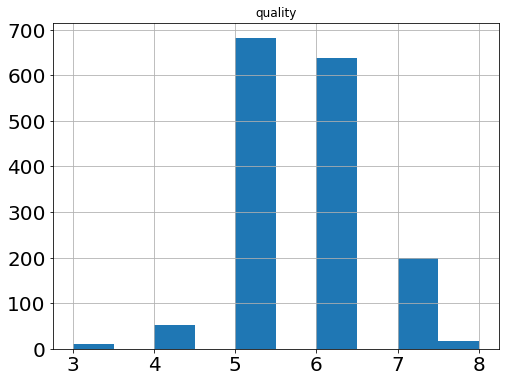

In [11]:
# Making a histogram of the `quality` variable.
wine_df.hist(column="quality",figsize=(8, 6),xlabelsize=20,ylabelsize=20);

Well, this is a nice plot. But, if you look carefully, the histogram bins are not centered at 0, 1, 2, 3, 4, etc. This looks slightly awkward. The `DataFrame.hist()` method will not allow us to control and modify it (check [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) to verify it). Let's fix this by using `matplotlib.pyplot.bar()`. Scroll down to the next code block and see the beautiful histogram. How to create such a plot? Please refer to the following links for syntax and more details.
+ [Matplotlib.pyplot.bar()](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.bar.html)
+ [Matplotlib.pyplot.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
+ [Color Demo](https://matplotlib.org/3.5.0/gallery/color/color_demo.html)

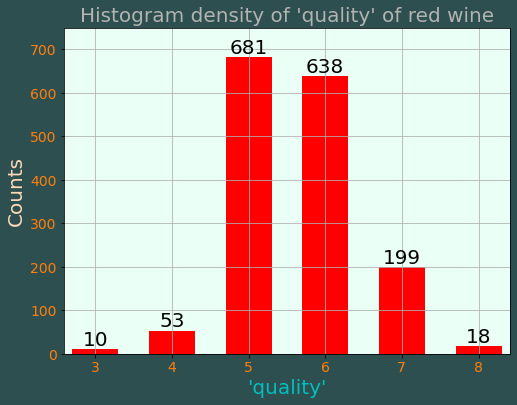

In [12]:
# 1) RGB and figsize tuple:
fig, ax = plt.subplots(figsize=(8, 6),facecolor=(.18, .31, .31))
# 2) hex string:
ax.set_facecolor('#eafff5')
# 3) gray level string:
ax.set_title('Histogram density of \'quality\' of red wine', color='0.7', fontsize=20)
# 4) single letter color string
ax.set_xlabel('\'quality\'', color='c', fontsize=20)
# 5) a named color:
ax.set_ylabel('Counts', color='peachpuff', fontsize=20)
# 6) Making a histogram of the `quality` variable
labels, counts = np.unique(wine_df['quality'], return_counts=True)
# counts, edges, bars = plt.hist(wine_df['quality'])
width = 0.6 # The width(s) of the bars.
bar_labels = ax.bar(labels, counts, width=width, align='center', facecolor='red')
# 7) tab notation:
ax.tick_params(labelcolor='tab:orange')
# 8) Set a margin
ax.margins(0.02)
# 9) Set limits
plt.ylim(0, 1.1*max(counts))
# 10) Include grid
plt.grid(True)
# 11) Set fontsize of tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Let's also show the number of counts over each bar. For further details, see the
# following links:
# https://stackoverflow.com/questions/39841733/matplotlib-histogram-how-to-display-the-count-over-the-bar
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar_label.html

heights = tuple(i for i in counts)
ax.bar_label(bar_labels,fontsize=20)


plt.show()

Nice! The histogram looks beautiful. I just chose the red color for fun since we are dealing with red wine!!

This simple visualization can be used to answer a few important questions immediately:
 + what value do most wines have for `quality`?
   - Most wines have values of 5 and 6.
 
 + What is the minimum and maximum values of `quality` at least from the observed data? Or, in other words, what is the observed range? 
   - Minimum observed value is 3 and maximum value is 8. So, the range is [3, 8].
 
If you want to reveiew the concepts of the above statistical summaries, then check Chapter 2 of the *AoS*.

If you like to verify the number of counts of each label in the histogram shown in the plot above, then you can check it by using the `.value_counts()` method on the `quality` column of the `wine_df` DataFrame. Check the syntax [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html). This will return the counts of unique values of the `quality` column. Pass the argument `dropna=False` in the `.value_counts()` method. This will then also show the value counts of NaN if NaN are present in the `quality` variable.

In [13]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
wine_df["quality"].value_counts(dropna=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The result above is consistent with the histogram bin counts. Furthermore, it shows that the `quality` column does not have any NA or missing values.

As we used the `.info()` and `.describe()` methods on the entire `wine_df` DataFrame in Section 1c, let us now apply these methods only on the `quality` column to exclusively focus on the summary statistics of the `quality` column. Note `wine_df["quality"]` is a series and `.info()` works on a DataFrame. So, we need to convert the series, `wine_df["quality"]`, into a DataFrame before applying `.info()` method. For this, we use `to_frame()` [method](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html).

In [14]:
type(wine_df["quality"])

pandas.core.series.Series

In [15]:
wine_df["quality"].to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  1599 non-null   int64
dtypes: int64(1)
memory usage: 25.0 KB


**What do you notice from the above summary?**

The number of observations/measurements of `quality` variable is 1599 which is same as the total number of rows of the `wine_df` DataFrame. Thus, there is no missing values, and all of the values are integer-valued as indicated by `Dtype=int64`.

In [16]:
# Get a basic statistical summary of the variable 
# wine_df["quality"].to_frame().describe()
wine_df["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

**What do you learn from the output of `.describe()` method?**

The outputs of the `.describe()` methods are again consistent with the histogram. Since there are just as many values as there are rows in the dataset, we can infer again that there are no NAs for the `quality` variable.

**Search for output variable**:

As highlighted earlier, the `quality` variable conduces nicely to classification analysis. This is because, while the values for the `quality` variable are numeric, those numeric discrete values represent *categories*; and the prediction of category-placement is most often best done by classification algorithms. Review Chapter 6 of *AoS* that discusses the decision tree output by running a classification algorithm on the Titanic dataset. For now, we'll continue with our regression analysis, and continue our search for a suitable dependent variable. 

Since rest of the variables of our wine dataset are continuous (`Dtype=float64`), we could — in theory — pick any of them. But that does not mean that they are all equally sutiable choices. What counts as a suitable dependent variable for classical regression analysis is determined not just by *intrinsic* features of the dataset (such as data types, number of NAs etc) but by *extrinsic* features, such as, which variables are the most interesting or useful to predict, given our aims and values in the context we're in. Almost always, we can only determine which variables are sensible choices for dependent variables with some **domain knowledge**. 

Not all of us might be wine buffs, but one very important and interesting feature of wine is its **acidity**. As the Waterhouse Lab at the University of California, Davis [explains](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity): "acids impart the sourness or tartness that is a fundamental feature in wine taste. Wines lacking in acid are "flat." Chemically the acids influence titrable acidity which affects taste and pH which affects  color, stability to oxidation, and consequantly the overall lifespan of a wine."

*However, our data does not support the above observation* since there is very weak correlation between `quality` and `fixed.acidity` (correlation coefficient ~0.12; see output of cell# 17 below). Nevertheless, we will proceed with the above expert observation and choose **fixed acidity** (`fixed.acidity` variable) as a dependent variable in our classical regression analysis. 

**Remark**: There *is*, however, a way to still choose `quality` as target variable in classical linear regression analysis by relying on dummy/indicator variables; See details in Seciton 4 on **Multioutput Linear Regression.**

For now, we're going for fixed acidity as our dependent variable. So, what we now want is to get an idea of *which variables are related interestingly to this target variable* of `fixed.acidity`. 

We can call the `.corr()` method on our wine data to look at all the correlations between our variables. As the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) shows, the default correlation coefficient is the Pearson correlation coefficient (p.58 and p.396 of the *AoS*); but other coefficients can be plugged in as parameters. Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1. 

In [17]:
# Call the .corr() method on the wine dataset 
wine_df.corr()

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000         -0.256131     0.671703   
volatile.acidity          -0.256131          1.000000    -0.552496   
citric.acid                0.671703         -0.552496     1.000000   
residual.sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free.sulfur.dioxide       -0.153794         -0.010504    -0.060978   
total.sulfur.dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.114777   0.093705            -0.153794   
volatile.acidity            0.001918   0.061298            -0.010504   
citric.acid                 0.143577   0.203823            -0.060978   
residual.sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free.sulfur.dioxide         0.187049   0.005562             1.000000   
total.sulfur.dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile.acidity                  0.076470  0.022026  0.234937  -0.260987   
citric.acid                       0.035533  0.364947 -0.541904   0.312770   
residual.sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free.sulfur.dioxide               0.667666 -0.021946  0.070377   0.051658   
total.sulfur.dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed.acidity        -0.061668  0.124052  
volatile.acidity     -0.202288 -0.390558  
citric.acid           0.109903  0.226373  
residual.sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free.sulfur.dioxide  -0.069408 -0.050656  
total.sulfur.dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

Let's note the following from the above table:

 + `fixed.acidity` has strong correlations with `citric.acid`, `density`, and `pH`
 + A few other variables such as, `volatile.acidity`, `residual.sugar`, `free.sulfur.dioxide`, `total.sulfur.dioxide`, `sulphates`, and `quality`, do not show significant correlations with `fixed.acidity`
 + The remaining two variables (`chlorides` and `alcohol`) have almost no correlation with `fixed.acidity`.
 
Now, let's also remark how the other variables are correlated with each other:
 + The variables, `citric.acid`, `density`, and `pH` (that have strong correlations with `fixed.acidity`), are moderately correlated with each other.
 + The variables (`volatile.acidity`, `residual.sugar`, `free.sulfur.dioxide`, `total.sulfur.dioxide`, `sulphates`, and `quality`), that do not have siginifcant correlations with `fixed.acidity`, have also weak to almost no correlations among each other. However, the two forms of SO2, namely, `free.sulfur.dioxide` and `total.sulfur.dioxide`, are somewhat strongly correlated as expected.
 + The other possible correlations (such as between `citric.acid` and `volatile.acidity`, or between `chlorides` and `alcohol`, etc.) show values that somewhat range from reasonably strong correlations to almost no correlations.
 
This above observation shows that the dominant dimension of input variables is likely to be less than a 11-dimensional space.

Now, how about visualizing the correlation table with some warm and cool colors? It will then possibly be also easy for many of us to interpret the correlations between different variables better. This point of visualization brings us to the next section.

## 2. Cleaning, transforming, and visualizing correlations

The heading of section ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in *that order*. When our data is relatively clean (as is the case for our red wine data), the obvious next step would be to visualize the data. Normally, however, most data is less sterile, and we then need to do cleaning and transforming prior to visualizing. 

Let us start by plotting pairwise scatterplots to check out how different variables relate to one another. For this, we are going to use `seaborn`'s [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

+ How to control different parameters of seaborn plots (such as font size, figure size, etc.)?
   + Refer to this nice [set of illustrations](https://atmamani.github.io/cheatsheets/seaborn/seaborn_cheat_sheet_4/). Also, particularly, check seaborn's `.set_context()` [documentation](https://seaborn.pydata.org/generated/seaborn.set_context.html).

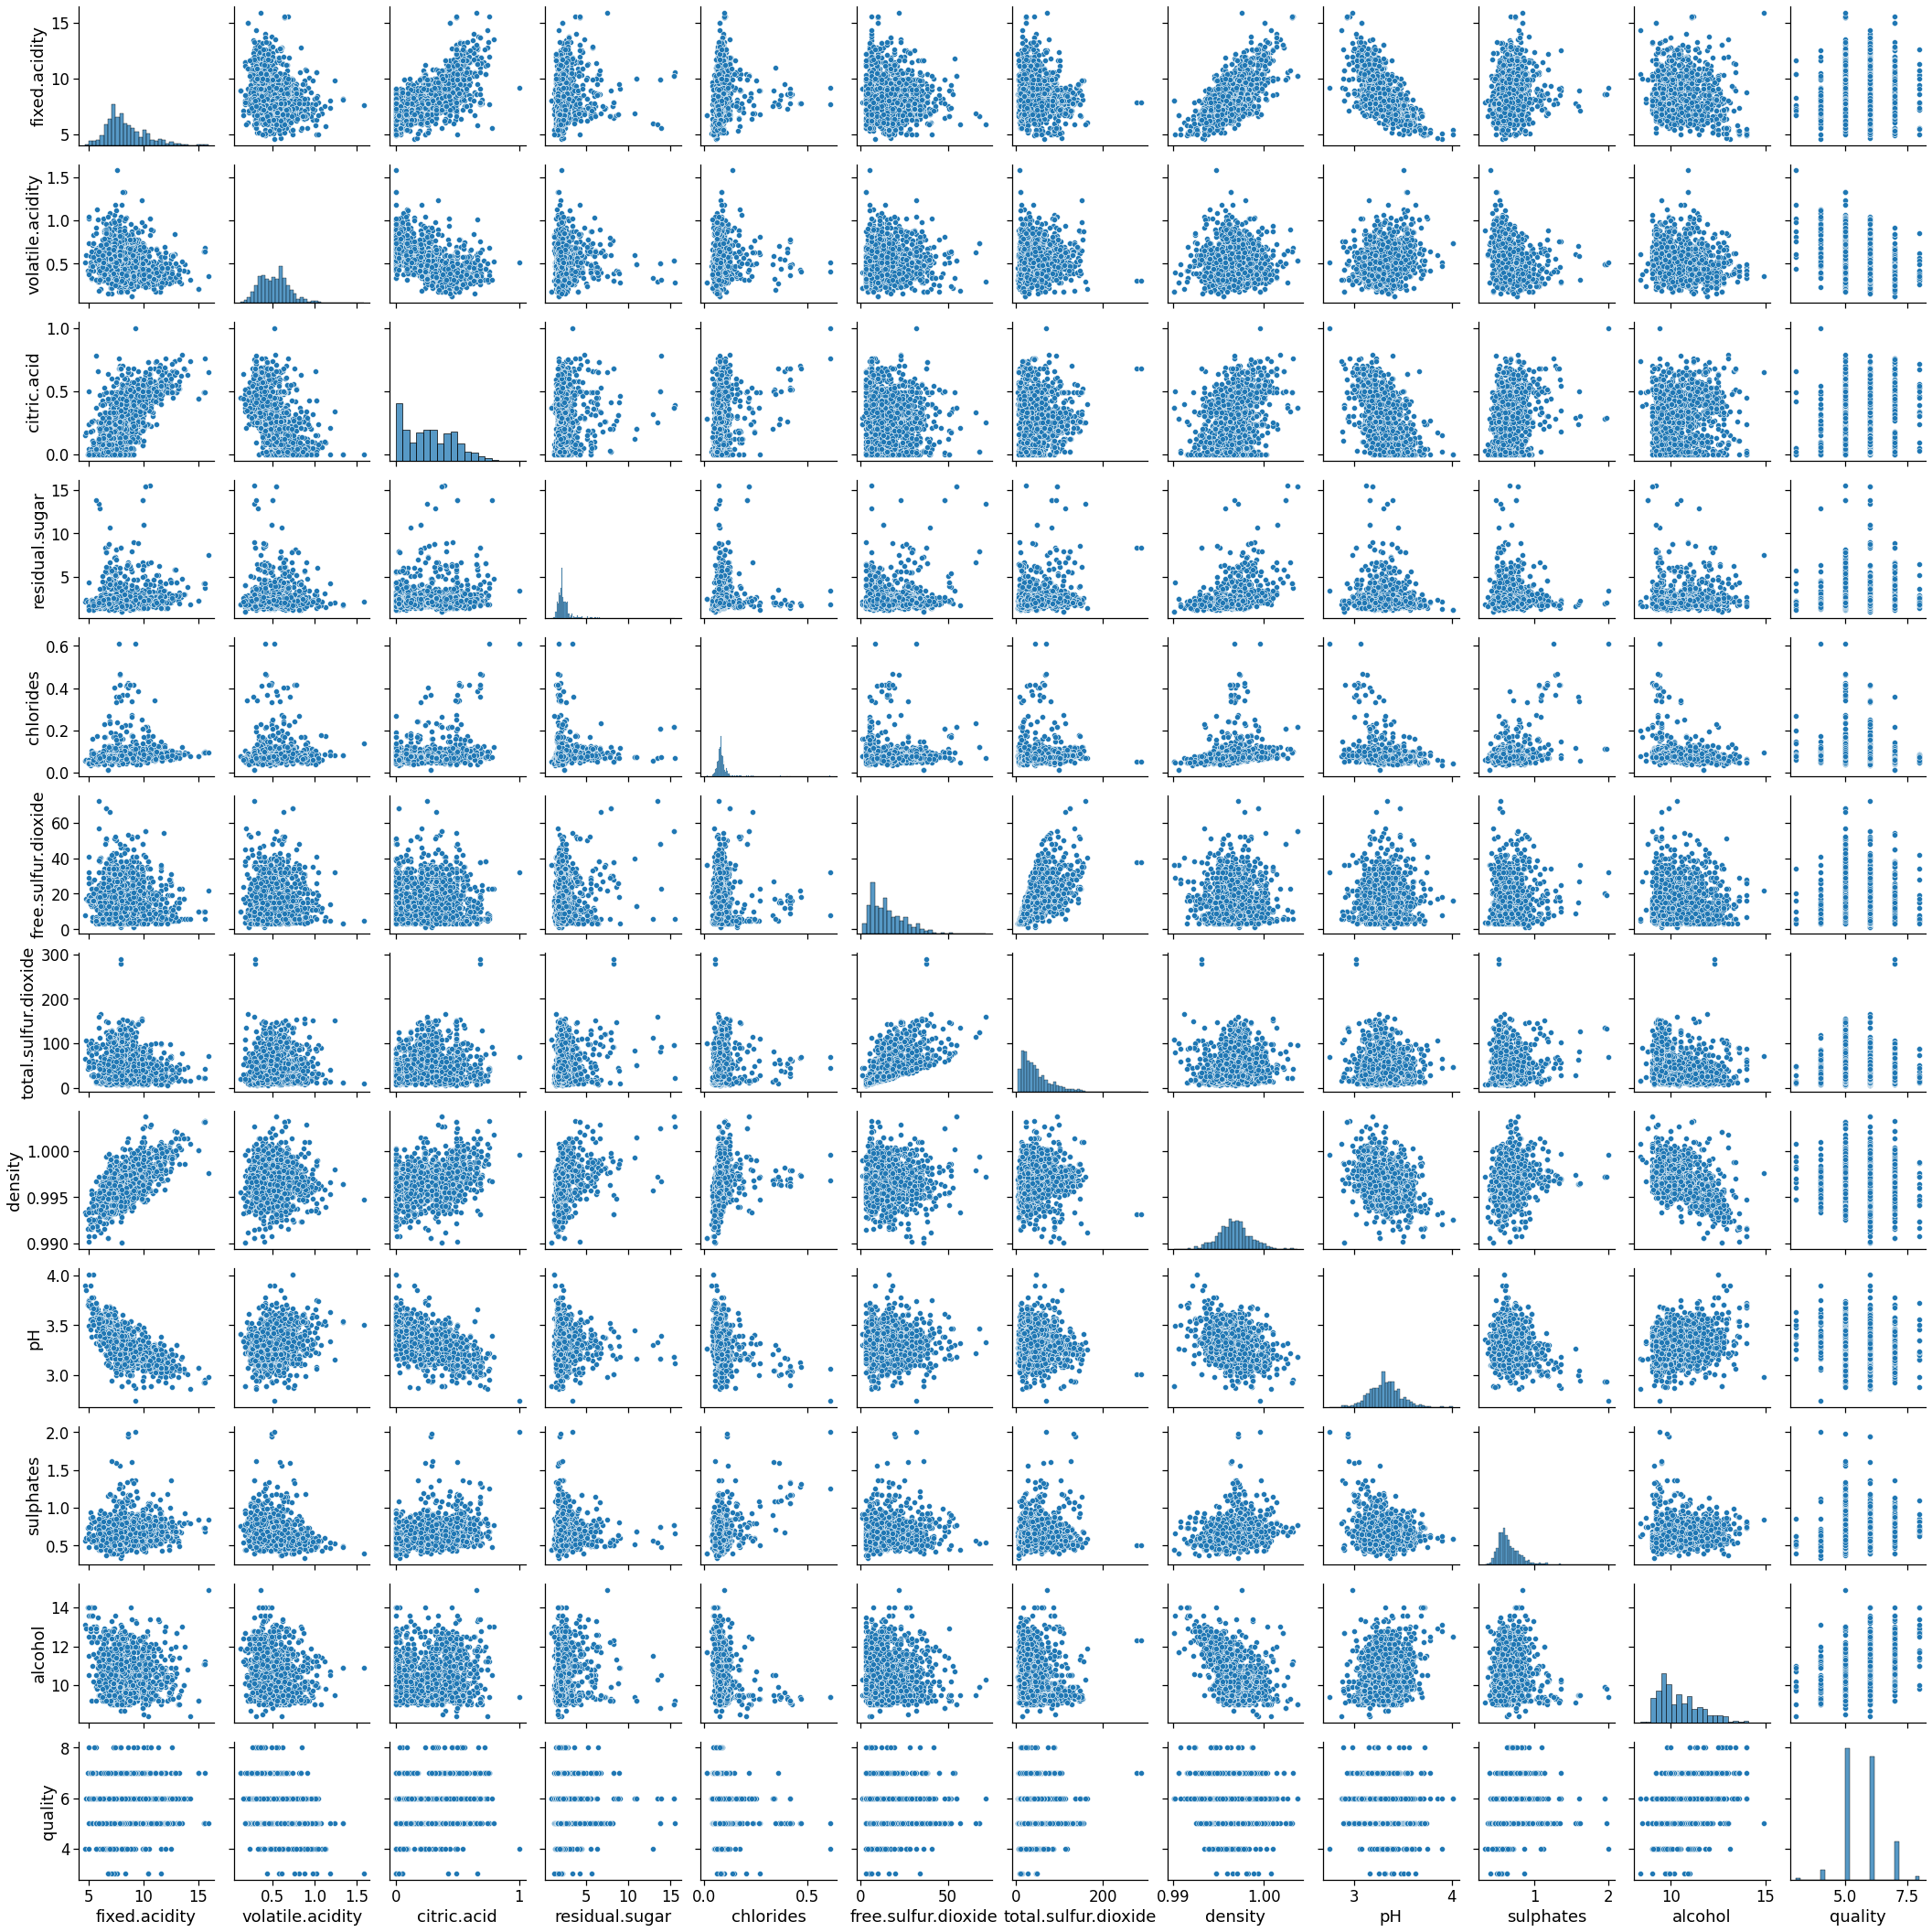

In [18]:
# Make a pairplot of the wine data
sns.set_context(context='notebook', font_scale=1.5)
sns.pairplot(wine_df);

This output of `sns.pairplot()` looks untidy. Let's try to clean it up by using `seaborn`'s [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) class. To control color, please refer how to specify colors in `matplotlib` [here](https://matplotlib.org/stable/tutorials/colors/colors.html) because `seaborn` relies on keyword arguments that are passed down to the corresponding functions of `matplotlib.pyplot` which was imported earlier using `import matplotlib.pyplot as plt` at the beginning of this notebook.

In the pairwise plot bleow, we will show [scatterplots](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) (`sns.scatterplot`) on the upper diagonal part and [bivariate distributions](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) (`sns.kdeplot`) using kernel density estimation on the lower diagonal part. Along the diagonal, we will as usual show the  the marginal [histogtram](https://seaborn.pydata.org/generated/seaborn.histplot.html) (`sns.histplot`) of the data in each column.

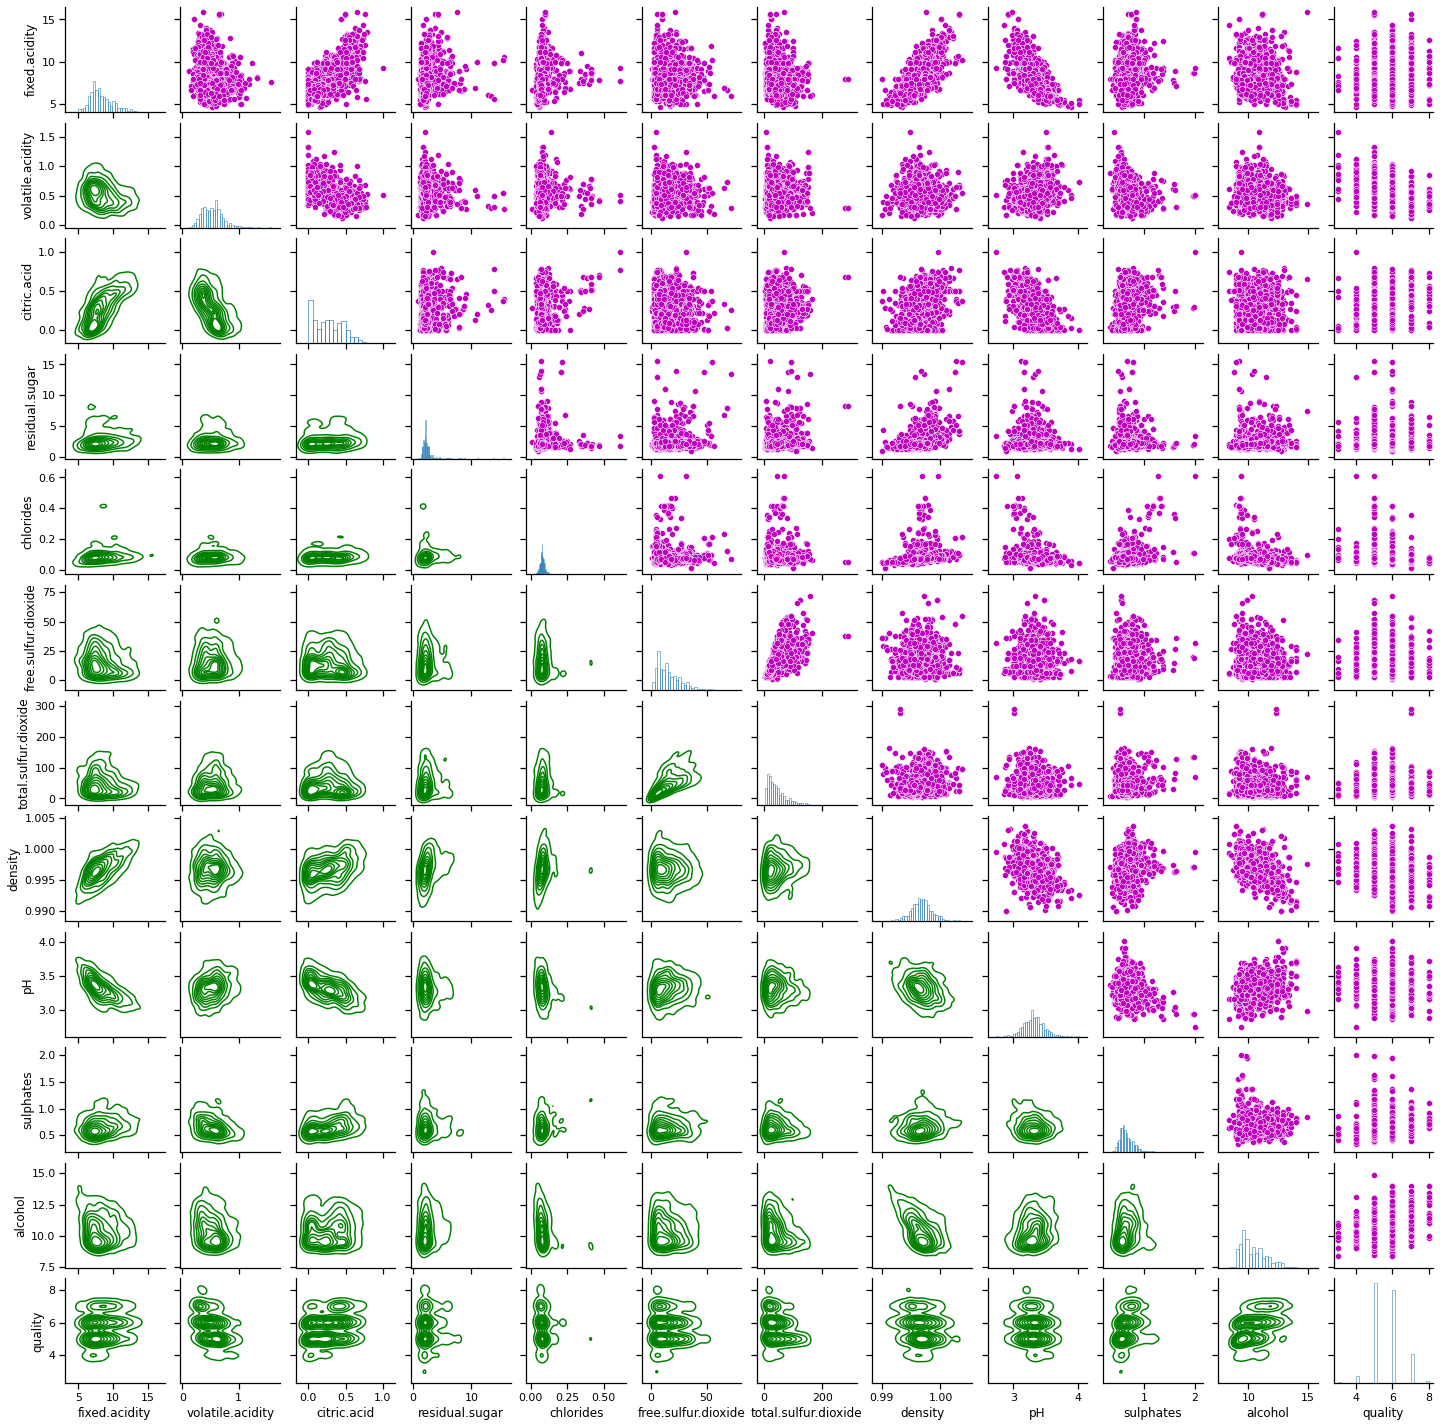

In [19]:
sns.set_context(context='notebook', font_scale=1)

g = sns.PairGrid(wine_df)
g.map_upper(sns.scatterplot,color='m')
g.map_lower(sns.kdeplot,color='g')
g.map_diag(sns.histplot,fill=False)
g.fig.set_size_inches(20,20)

This plot looks much better and relatively clear. Let's take a moment to review the output. The plot certainly outputs a lot of information at once. What can we infer from it? What can we *not* justifiably infer from it?

Here's a couple of points worth mentioning: 
- a given cell value represents the correlation that exists between two variables 
- on the diagonal, we see histograms of each variables. This is because pairplotting the variables with themselves would be pointless. So, histograms to show the distributions of those variables are better option along the diagonal. This allows us to quickly see the shape of each variable's values.  
- the plots of the `quality` variable form horizontal or vertical bands, due to the fact that it's a discrete variable. This shows again that this variable is not directly suitable for classical regression analysis.
- Notice that some of the nice plots invite a line of best fit, such as `alcohol` vs `density` (correlation = -0.496180). Others, such as `citric.acid` vs `alcohol` (correlaiton = 0.109903) or `free.sulfur.dioxide` vs `density` (correlaiton = -0.021946), are more inscrutable.

Instead of plotting pairwise plots of *all* the variables, we can also specify lists of `x_vars` and `y_vars` to define the rows and columns of the `.pairplot()` or the `.PairGrid()` figure. Let us display scatterplots of the target variable (`fixed.acidity`) vs some of the regressors (`citric.acid`, `density` and `pH`) that are strongly correlated to the target variable.

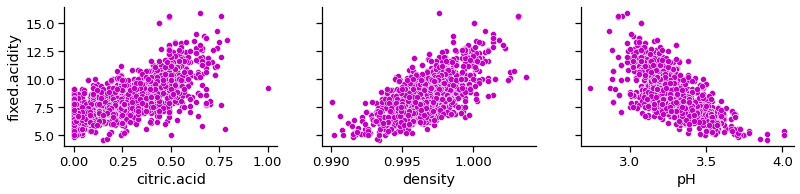

In [20]:
sns.set_context(context='notebook', font_scale=1.2)

x_vars = ["citric.acid", "density", "pH"]
y_vars = ["fixed.acidity"]
g = sns.PairGrid(wine_df, x_vars=x_vars, y_vars=y_vars)

g.map_offdiag(sns.scatterplot,color='m')
g.fig.set_size_inches(12,3)

We see that each of the variables (`citric.acid`, `density` and `pH`) has a line of best fit with `fixed.acidity`.

We can similarly also do scatterplots for other variables of our interest. Let us consiser for example `citric.acid`, `density`, `pH`, and `alcohol` since these variables seem to be well corelated, and they could be some of the important input variables in predicting `fixed.acidity`.

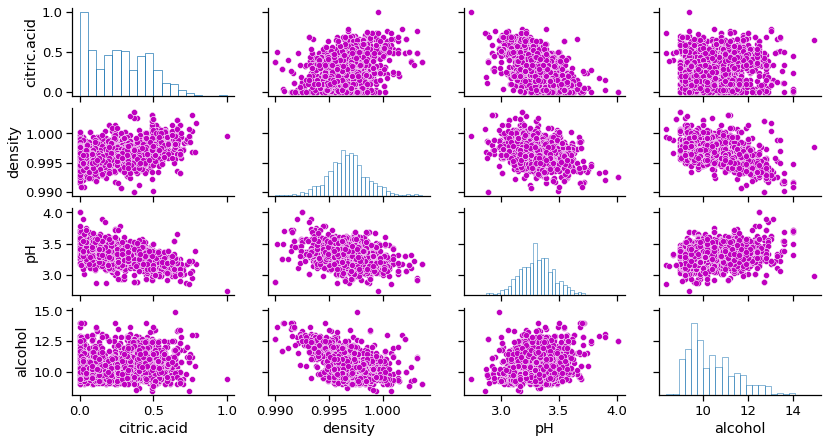

In [21]:
sns.set_context(context='notebook', font_scale=1.2)

vars = ["citric.acid", "density", "pH", "alcohol"]
g = sns.PairGrid(wine_df, x_vars=vars, y_vars=vars);

g.map_offdiag(sns.scatterplot,color='m')
g.map_diag(sns.histplot,fill=False);
g.fig.set_size_inches(12,6)

The plots show that there are clearly best fit lines (i.e., strong correlation) between a few combinations of the above variabels such as, `citric.acid` & `pH`, and `density` & `alcohol`.

The above two sets of scatterplots (`.pairplot()` and `.PairGrid()`) demonstrate that some of the input variables are significantly correlated. So, we can possibly think of considering a dimension reduction techqniue (such as PCA) before implementing the classical multiple linear regression analysis. But, hold on to that thought for now, and let us see if we can unearth any thing further. On that note, consider a linear regrsseion model based on only one input variable. So, which variable might be a best choice as that input variable?

So far, we have used `.corr()`, `.pairplot()` and `.PairGrid()` on our red wine data set. They have some flaws and some advantages. We can possibly get the best of both worlds with a heatmap. See seaborn's documenation on [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for syntax details. Set argument `annot=True` to show the correlation value in each cell of heatmap. Also, pass `annot_kws={"size": 30}` to control the annotation font size. 

 + You can also review this [example document](https://indianaiproduction.com/seaborn-heatmap/) for some illustration about how to use different arguments of seaborn's heatmap. 
 + How to control xticklabels and yticklabels (fontsize, rotation,etc.)? See [here](https://moonbooks.org/Articles/How-to-increase-the-size-of-axes-labels-on-a-seaborn-heatmap-in-python-/).
 + How to control the fontsize of colorbar ? See this example [here](https://stackoverflow.com/questions/37233108/seaborn-change-font-size-of-the-colorbar) and Matplotlib's [documentation](https://matplotlib.org/2.0.1/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) for `.set_xticklabels()`.

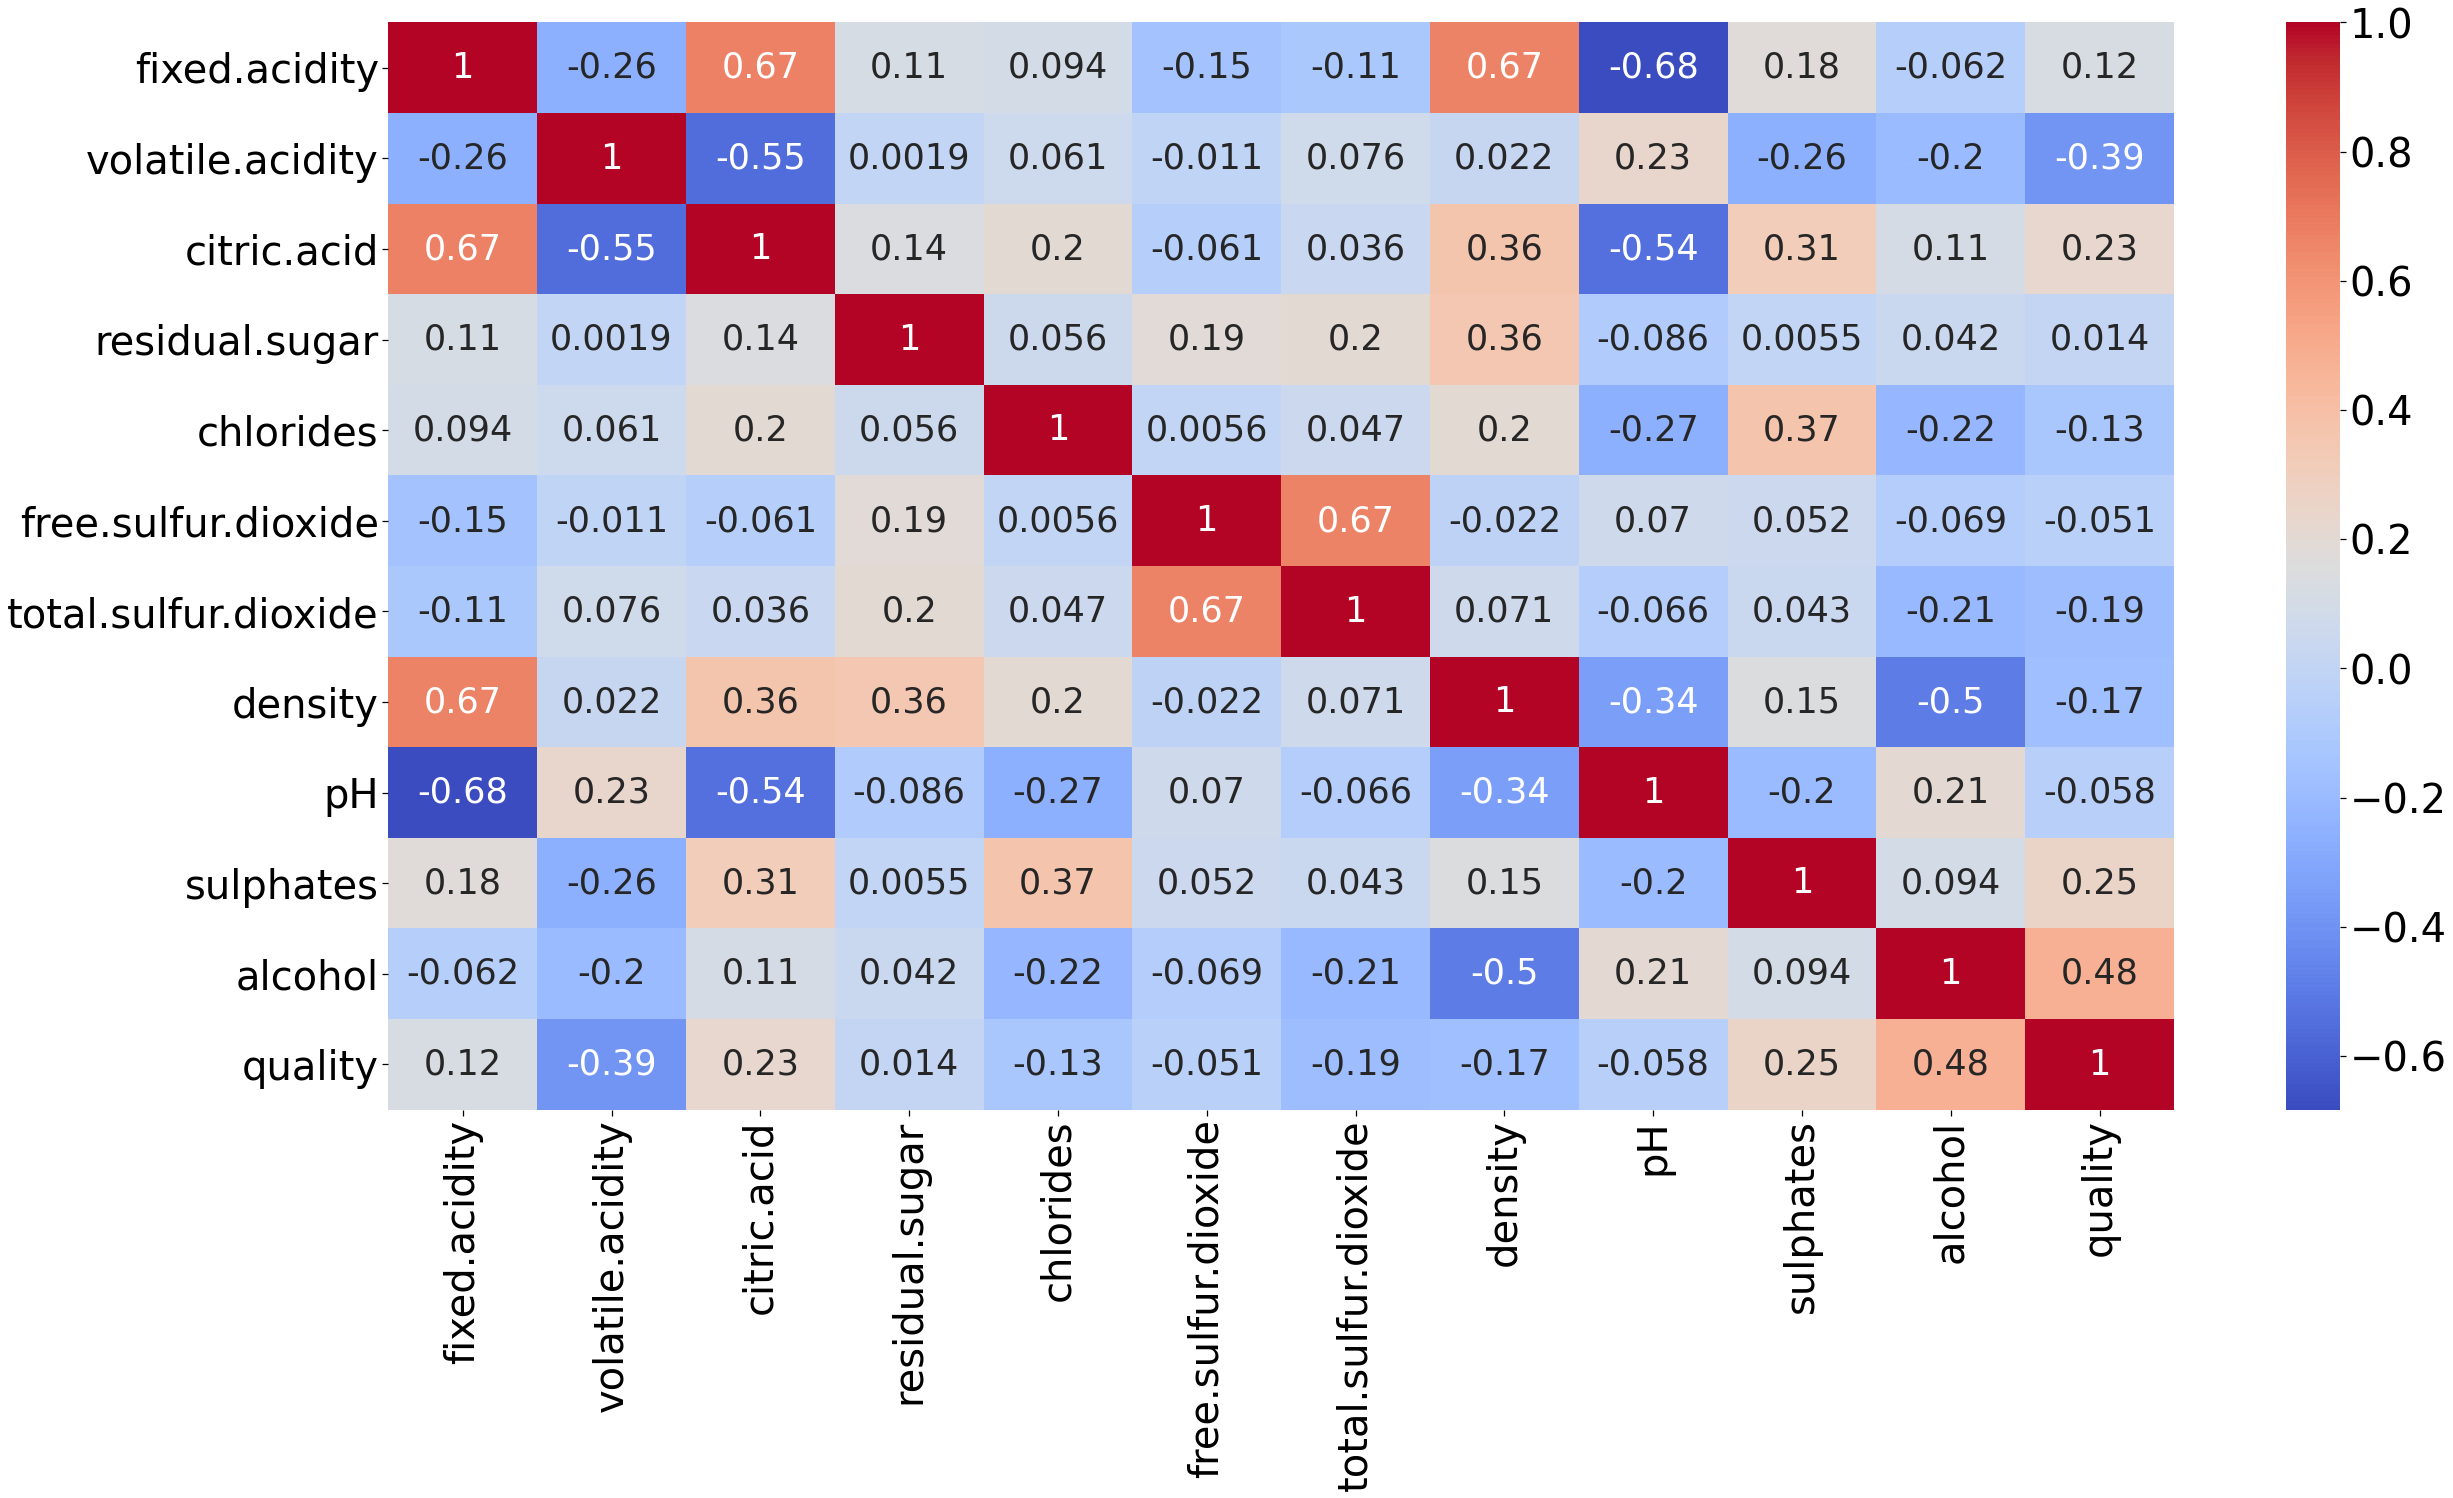

In [22]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))

# https://indianaiproduction.com/seaborn-heatmap/
ax = sns.heatmap(wine_df.corr(), cmap="coolwarm", annot=True, annot_kws={"fontsize": 35})

# https://moonbooks.org/Articles/How-to-increase-the-size-of-axes-labels-on-a-seaborn-heatmap-in-python-/
# https://matplotlib.org/2.0.1/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 40, rotation=90);
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 40);

# https://stackoverflow.com/questions/37233108/seaborn-change-font-size-of-the-colorbar
ax.collections[0].colorbar.ax.tick_params(labelsize=40)

The plot above is essentially same as that of `.corr()` method  -- at least numerically. The colorization, however, provides musch easier interpretation of the correlation.

Let us take a moment to think about the following questions:
- How does color relate to extent of correlation?
- How might we use the plot to show us interesting relationships worth investigating? 
- More precisely, what does the heatmap show us about the fixed acidity variable's (output variable for classical regression analysis) relationship to the other variables?

The high positive correlation has warm colors (dark red, orange, etc.), while the high negative correlation has cool colors (dark blue, light blue, etc.). This helps us to visually associate the correlartion values with different shades colors.

As we have noted earlier in Section 1 and Section 2, we observe again here that particularly three variables, namely, `citric.acid`, `density`, and `pH`, have relatively strong correlations with `fixed.acidity`. We have used `.PairGrid()` earlier to display three scatter plots between `fixed.acidity` vs each of these three variables. Let us show each of them again separately using `sns.scatterplot()`. Consider `density` vs `fixed.acidity` by passing the argument `x="density"` and `y="fixed.acidity"`. Of course, we also need to pass the argument `data=wine_df` to provide the input data structure. Refer to the [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) for more details.

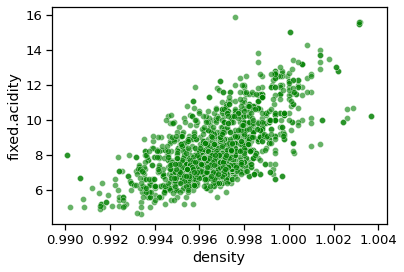

In [23]:
# Plot density against fixed.acidity
plt.figure(figsize=(6,4))
sns.set_context(context='notebook', font_scale=1.2)
sns.scatterplot(x="density", y="fixed.acidity", data=wine_df, color='green', alpha = 0.6);

There is a positive correlation, and quite a steep one. We also some outliers, but as a whole, there clearly appears a steep line which can be drawn by using seaborn's `.regplot()`. See [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) for more details. Pass a few aditional arguments as shown in the code block below to control the appearance and colors of the plots. See a few example illustrations [here](https://medium.com/@kathy.lu.rentals/visualizing-with-seaborn-regplot-2235ccbaedd4).

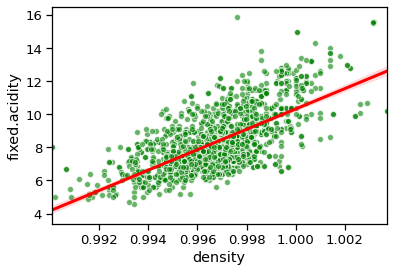

In [24]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
plt.figure(figsize=(6,4))
sns.set_context(context='notebook', font_scale=1.2)
sns.regplot(x="density", y="fixed.acidity", data=wine_df,scatter_kws = {"color": "green", "alpha": 0.6,"edgecolors":"white"}, line_kws = {"color": "red", "lw":3});
# scatter_kws = {"color": "purple", "alpha": 0.6, "edgecolors":"white"}

The line of best fit is shown in red and it matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. We can similarly use `.regplot()` method to show the scatter plots and the line from the linear regression model fit between `fixed.acidity` and the other two strongly correlated variables (i.e., `citric.acid` and `pH`). We can do this by using `.PairGrid()` object as we did earlier. But, instead of using `.map_offdiag()`, we will simply use `.map()` now since there is really no diagonal plots to display. See this [tutorial](https://seaborn.pydata.org/tutorial/axis_grids.html) for some nice examples.

Note that the real benefits of using the `.PairGrid()` class can be realized when we want to create **custom functions** to map different information onto different subplots of `.PairGrid()` object. For example, in the following set of outputs of `.regplot()` method, let us include the corresponding value of the correlation coefficient for each pair of variables. To do so, we need to write a custom function that takes in two arrays, calculates the statistic, and then draws it on the graph. The following code shows how this is done (credit to this this [link](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) and this [link](https://stackoverflow.com/questions/30942577/seaborn-correlation-coefficient-on-pairgrid)). We write the custom function `corr()` and pass it to `g.map()`.

Similarly, if I like to use different colors for different PairGrid subplots, then we can do similar things but it gets slightly more complicated. In general, the [question](https://stackoverflow.com/questions/54466588/how-to-adjust-individual-attributes-of-pairgrid-plots) is:<br/>
**How to adjust individual attributes of PairGrid plots?**
There is no built-in way to pass differing arguments to PairGrid. However, you can rely on the fact that the grid is filled consecutively in the order of the dataframe columns. Hence, using the concept of **[iterator](https://wiki.python.org/moin/Iterator)** over the desired choice of colors (or any other parameter) would allow for different parameters to control different PairGrid subplot. Here, we define and use the `color_string` iterator to pass different color for different PairGrid subplots.

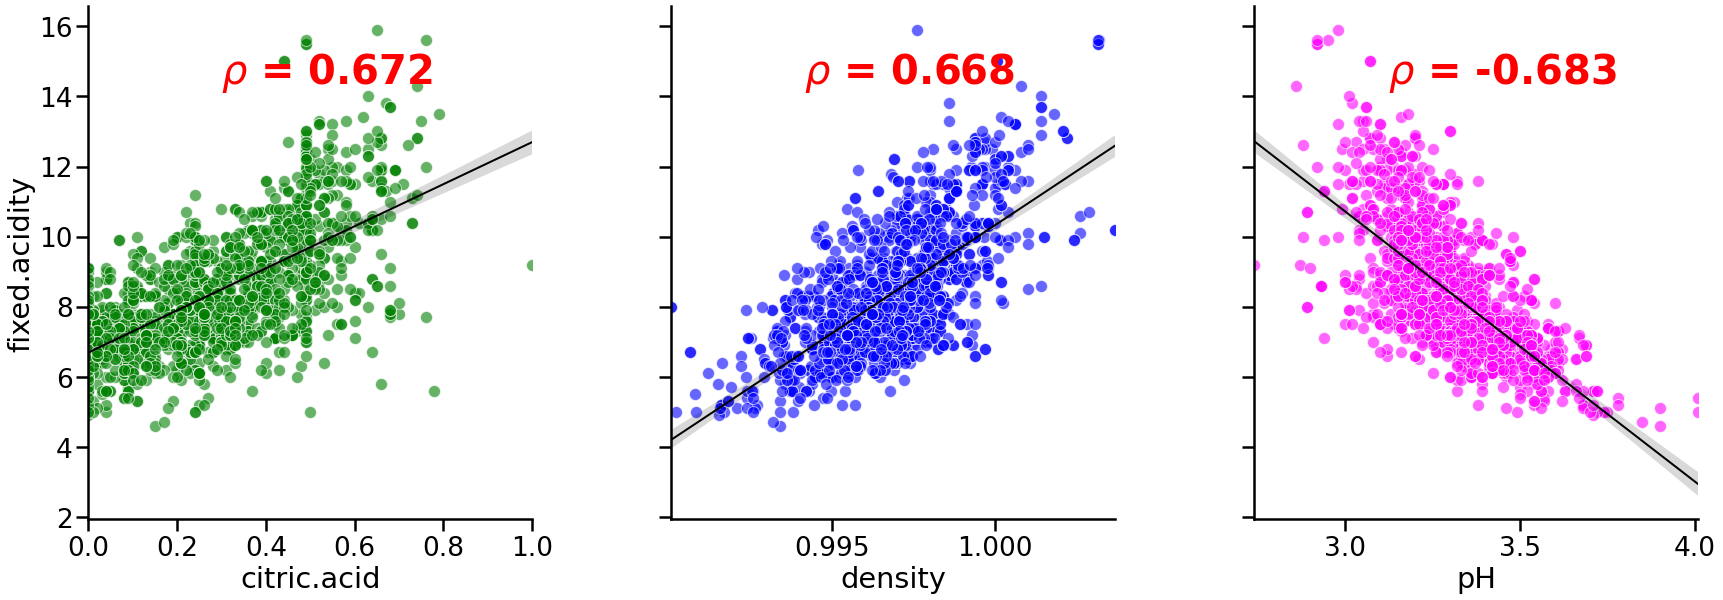

In [25]:
# Custom function to calculate correlation coefficient between two arrays and to use in
# .map() function of PairGrid object
# Source: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 3))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 0.85), size = 40, xycoords = ax.transAxes, color='red', weight='bold')

# Iterator: https://stackoverflow.com/questions/54466588/how-to-adjust-individual-attributes-of-pairgrid-plots
color_string =iter(["green","blue","magenta"])
def update_regplot(x, y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x,y=y,scatter_kws = {"color": next(color_string), "alpha": 0.6, "edgecolors":"white"}, line_kws = {"color": "black", "lw":2},ax=ax)
    
    
sns.set_context("poster", font_scale=1.2)

x_vars = ["citric.acid", "density", "pH"]
y_vars = ["fixed.acidity"]
g = sns.PairGrid(wine_df, x_vars=x_vars, y_vars=y_vars)
# g.map(sns.regplot,scatter_kws = {"color": "blue", "alpha": 0.6, "edgecolors":"white"}, line_kws = {"color": "black", "lw":2})
g.map(update_regplot)
g.map(corr)
g.fig.set_size_inches(30,20);

All the three variables show strong correlations and there are clearly nice looking best lines displaying significant linear relationship with `fixed.acidity`. Let's see if we can predict fixed acidity based on one of these three variables using linear regression. Consider first the `density` variable.

Before moving forward, set the seaborn's context to the base context of `"notebook"` and default `font_scale=1`. Otherwise, all the future seaborn's plots will use the last parameters of `.set_context()`.

In [26]:
sns.set_context("notebook", font_scale=1)

## 3. Modeling: Prediction of `fixed.acidity`

### 3a. Train/Test Split
First, we will split our dataset into a test set and a training set.

Refet to Chapter 6 of *AoS* to understand that splitting data is essential and a good practice when evaluating statistical models. In Chapter 6, Professor Spiegelhalter was evaluating a classification tree for Titanic data, but the same applies here when we're doing regression. Normally, we train our statistical model with 75% of the data and test on the remaining 25%. But, this can vary.

As a first model, we're only going to focus on two variables: `fixed.acidity` as our dependent variable, and `density` as our sole predictor variable. 

We'll be using scikit-learn's `train_test_split()` function to split the entire data set. For syntax, please refer to its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Create a variable called `X` and assign to it the `density` field of our wine data. Also, create a variable called `y` (that's right, lower case) and assign to it the `fixed.acidity` field as our target variable. The lower case `y` is being used to indicate that there is only *one* target variable unlike multioutput linear regression in Section 6a where we will consider 6 dummy/indicator target variables associated with  `quality` which we will consider as our target variable in that section. 

**Note**: When subsetting our data into dependent and independent variables, it is essential to use double brackets as show below. This allows us to have shapes of `X` and `y` of the form `(R,1)` instead of `(R,)`, where `R` is the number of rows of `X` or `y` consisting of only *one* column (only one column since there is only one input variable and one target variable). This is important when fitting the linear regression model using `.fit()` method which expects the training set of data to be 2D array **not** 1D.

In [27]:
# Subsetting our data into our dependent and independent variables.
# Using double brackets allows us to have shapes of X and y of the form (R,1) instead of
# (R,), where R is the number of elements of X or y. This is required when fitting the linear
# regression model using .fit() method which expects the training set of data to be 2D array
# not 1D.
X, y = wine_df[["density"]], wine_df[["fixed.acidity"]]

# Split the data using train_test_split().
# The test_size parameter defines we use 75% of the data for training, and 25% for testing.
# The parameter random_state is passed to yield reproducible output across multiple 
# function calls
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [28]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1199, 1) (1199, 1)
(400, 1) (400, 1)


And, yes, the shape shows that they are 2D array. It also shows that the percentage of test data set is 25% of the entire dataset, while the remaining (75%) dataset will be used for training.

### 3b. First linear regression model: `scikit-learn` and one input variable
Sklearn has a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class in the `linear_model` module. We'll be using that to make our regression model.

In [29]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
del sklearn # We do not need the entire scikit-learn package.

The scikit-learn version is 1.1.1.


#### 3b-i. Input variable `density`

Since we are only dealing with one independent variable, i.e., `density`, in this model, we do **not** need to normalize the regressor (i.e., the independent variable). One of the current parameters of `LinearRegression()` is `normalize`, but it is deprecated since scikit-learn version 1.0 and will be removed in 1.2. If we wish to standardize (a normalization scheme) the data, then it is [recommended](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to use `StandardScaler` before calling `fit` on an estimator. The estimator should be creaeted without any `normalize` argument which means, by default, it will be set to `normalize=False`. For now, we will not use any normalization or standardization scheme. Later, when we will implement ***multiple linear regression*** model in Section 3d, 3e, and 3f, then we will standardize the data by using the `StandardScaler` [class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) before feeding the data into the estimator. The standardization enables handling of different level of scales/values of multiple regressors by removing the corresponding mean and scaling to unit variance. This scaling of data brings all features centered around 0 and make their variances in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn correctly from other features as expected.

In [30]:
# Create the model or estimator: make a variable called rModel, 
# and use it to create LinearRegression() which was imported earlier from scikit-learn
rModel = LinearRegression()

In [31]:
# We now want to train the model on our training data.
rModel.fit(X_train, y_train)

LinearRegression()

In [32]:
# Evaluate the model  
R_squared = rModel.score(X_train, y_train)
print(R_squared)

0.4548782410068156


We can also compute this R-Squared score using `sklearn.metrics.r2_score()` function which we already imported as `r2_score()`. Please refer to its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for syntax.

In [33]:
r2_score(y_train, rModel.predict(X_train))

0.4548782410068156

They do match exactly!

The formula for R-Squared score given in sklearn's [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score) can can be simply shown to be given by (see Wikipedia's [article](https://en.wikipedia.org/wiki/Coefficient_of_determination)):
\begin{equation}
    R^2 = 1 - \frac{\mathit{SSR}}{\mathit{TSS}}
\end{equation}
where, *SSR* represents the *sum of squares of residuals* (proportional to mean-squared-error, or MSE) and *TSS* is given by *total sum of squares* (proportional to the variance of the data). **For linear regression**, it is [known](https://en.wikipedia.org/wiki/Explained_sum_of_squares#Partitioning_in_the_general_OLS_model) that *TSS* is equal to the *SSR* plus *explained sum of squares (ESS)*, i.e., *TSS = SSR + ESS*. Here, the *explained sum of squares (ESS)* represents the sum of the squares of the deviations of the modeled values of the training dataset from the actual mean value of `y_train`. Thus, the R-Squared score (coefficient of determination) simply turns out to be the ratio, $R^2 = \frac{ESS}{TSS}$, which represents the proportion of variance (of the target variable `y_train`) that has been explained by the independent variables in the model (see Wikipedia [article](https://en.wikipedia.org/wiki/Coefficient_of_determination)). Hence, a value of 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 45% of the variation from the mean. There's more work to do!

In [34]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

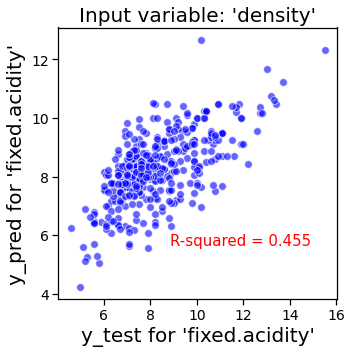

In [35]:
# Let's plot the predictions against the actual result. Use scatter()

fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(y_test,y_pred,color="blue", alpha = 0.6, edgecolors="white",s=60)

# Make the label
label = r'R-squared = ' + str(round(R_squared, 3))
    
# Add the label to the plot
ax.annotate(label, xy = (0.4, 0.2), size = 15, xycoords = ax.transAxes, color='red')

ax.set_xlabel('y_test for \'fixed.acidity\'', fontsize=20)
ax.set_ylabel('y_pred for \'fixed.acidity\'', fontsize=20)
ax.set_title('Input variable: \'density\'', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual fixed acidity, and along the y-axis we have the predicted value of fixed acidity.

There is a visible positive correlation, as the model has not been totally unsuccesful. But it's clear that it is not maximally accurate: wines with an actual fixed acidity of just over 10 have been predicted as having acidity levels from about 6.3 to 13.

#### 3b-ii. Custom function to automate ML modeling steps

We can also try predicting `fixed.acidity` using the other two variables (i.e., `citric.acid` and `pH`) that are significantly correlated with `fixed.acidity`. Before doing it, let us write a custom function to automate the entire process of splitting the data, creating the model or estimator, predicting the test case, and plotting the results, etc. described above. We will be using this function, that relies on sklearn package, in the rest of this notebook several times. In this function, we will implement the option of choosing `StandardScaler` which will be useful later to implement the ***multiple linear regression*** model. The custom function will also be used for multiple linear regression.

In [36]:
# Define the function
def sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title, perfect_corr_line=0, best_fit_line=0, return_output = 0):
    
    # Split the data using train_test_split()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

    # Create the model or estimator
    rModel = LinearRegression()

    # Scale the training data and Fit the model
    if StandardScaler_flag == 1:
        # Scale the training data
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        
        # Scale the test data
        X_test = scaler.transform(X_test)

    
    # Fit the estimator
    rModel.fit(X_train, y_train)
    
    # Evaluate the model
    R_squared = rModel.score(X_train, y_train)
    
    # Make predictions
    y_pred = rModel.predict(X_test)
        


    # Print if standard scaling is done or not, the test_size, and R_squared score
    print(f'\ntest_size = {test_size}')
    print(f'\nStandardScaler_flag = {StandardScaler_flag}')
    print(f'\nR_squared score: {R_squared}\n')
    
    
    # Let's plot the predictions against the actual result.
    fig, ax = plt.subplots(figsize=(5, 5))
        
    # Also add the best fit line between y_test and y_pred 
    # --> Use sns.regplot to achieve both the tasks of plotting the points and the best fit line
    # If no best fit line, then  use scatter()
    if best_fit_line == 1:
        sns.regplot(x=y_test,y=y_pred, scatter_kws = {"color": marker_color, "alpha": 0.6, "edgecolors":"white", "s": 60}, line_kws = {"color": "black", "lw":2},ax=ax)
    elif best_fit_line == 0:
        plt.scatter(y_test,y_pred,color=marker_color, alpha = 0.6, edgecolors="white",s=60)
        
    # Make the label
    label = r'R-squared = ' + str(round(R_squared, 3))
        
    # Add different labeling
    ax.annotate(label, xy = (0.4, 0.2), size = 15, xycoords = ax.transAxes, color='red')

    ax.set_xlabel('y_test for \'fixed.acidity\'', fontsize=20)
    ax.set_ylabel('y_pred for \'fixed.acidity\'', fontsize=20)
    ax.set_title(plot_title, fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    if perfect_corr_line == 1:
        # Add a line for perfect correlation
        range_y_test = range(0,round(y_test['fixed.acidity'].max()))
        plt.plot([x for x in range_y_test],[x for x in range_y_test], color='red')
        
        ax.set_xlim(left=0,right =16)
        ax.set_ylim(bottom=0,top =16)

        plt.show()
    
    if return_output == 1:
        return y_test, y_pred

Let's check if the above function is working properly or not by carrying out the same set calculations that we did above in Section 3a and 3b for input variable `density`. We like to produce the exact same plot as earlier without plotting a line for perfect correlation and the best fit line which the custom function, `sklearn_linear_regression()`, allows. So, we simply use the default values for  `perfect_corr_line=0` and `best_fit_line=0` (thus, we will not assign anything to these two parameters). We will set them to 1 later in Section 3d for multiple linear regression. If the other argument `return_output = 1` (default set to 0), then it will return `y_test` and `y_pred` which may be used for further processing. We do not need to spit out `y_test` and `y_pred` for now. We will set `return_output = 1` Section 3d when we will consider multiple linear regression.


test_size = 0.25

StandardScaler_flag = 0

R_squared score: 0.4548782410068156



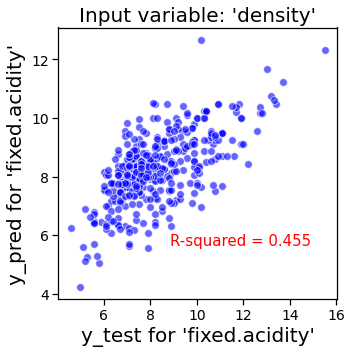

In [37]:
X, y = wine_df[["density"]], wine_df[["fixed.acidity"]]

StandardScaler_flag = 0 # We will scale the data if it is set = 1
test_size = 0.25
random_state = 123
marker_color = "blue"
plot_title = 'Input variable: \'density\''

sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title)

Great! Everything is matching. The function is working as expected. Let's use this custom function now to consider `citric.acid` as input variable.

#### 3b-iii. Input variable `citric.acid`

Here, we will use the same input arguments for followin parameters of the custom function `sklearn_linear_regression()`: `StandardScaler_flag = 0`, `test_size = 0.25`, and `random_state = 123`. So, we will not re-assign them again. The input arguments of two parameters shown in the following cell will only be changed to highlight that a different regressor or input variable is now considered.


test_size = 0.25

StandardScaler_flag = 0

R_squared score: 0.4435523354729012



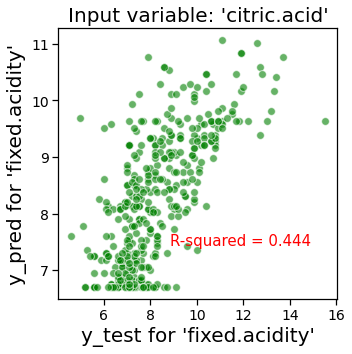

In [38]:
X = wine_df[["citric.acid"]]

marker_color = "green"
plot_title = 'Input variable: \'citric.acid\''

sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title)

#### 3b-iv. Input variable `pH`

Let's us repeat it for input variable `pH`. Here again, we will only pass different input arguments for `marker_color`and `plot_title` keeping the other parameters same. So, the three parameters (`StandardScaler_flag`, `test_size`, and `random_state`) will not be re-assigned.


test_size = 0.25

StandardScaler_flag = 0

R_squared score: 0.4524932447165033



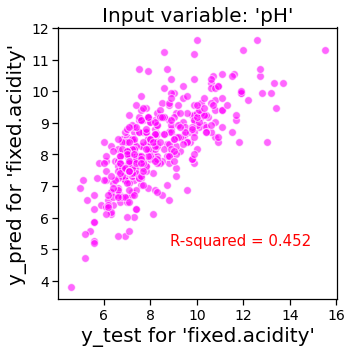

In [39]:
X = wine_df[["pH"]]

marker_color = "magenta"
plot_title = 'Input variable: \'pH\''

sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title)

All of the above models show significant positive correlation between the corresponding `y_test` and `y_pred`. This shows that they are not useless models. But, the R-squared scores for all the three cases are about 0.45. This implies that these three single-input linear regression models explain only about 45% of the variation from the respective actual mean. Thus, none of them is good enough for further use and prediction.

Let's build a similar model using a different package, namely, `statsmodels`, to see if we can get better result. Well, we should **not** get diffferent or better result since we will be using same classical linear regression on the same data set! But, let's verify it. For the following section, we will only focus on the model with `density` as the input variable.

### 3c. Second linear regression model: `statsmodels` and only `density` as input variable

For syntax of Ordinary Least Squares (OLS) class of the `statsmodels`, i.e., for `statsmodels.regression.linear_model.OLS`, refer to the [documentation](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html) and example there.

We will not normalize or scale the data here since we will use only one input attribute. We also do not need to re-assign the dependent variable `y` since it is already in our workspace from Section 3a and Section 3b-ii.

In [40]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
X = wine_df[["density"]]

# But here, reassign X the value of adding a constant to it. This is required for 
# Ordinary Least Squares Regression. Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
X = sm.add_constant(X)

We will use the same values for `test_size = 0.25` and `random_state = 123` that we used earlier in sklearn's `LinearRegression()`. So, no need to re-assign them.

In [41]:
# The rest of the preparation is as before.
y = wine_df[["fixed.acidity"]]

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

In [42]:
# Create the model
rModel = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel_results = rModel.fit()

In [43]:
# Evaluate rModel_results with .summary()
rModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     998.8
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          6.68e-160
Time:                        18:04:45   Log-Likelihood:                -2011.0
No. Observations:                1199   AIC:                             4026.
Df Residuals:                    1197   BIC:                             4036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -615.7316     19.746    -31.182      0.000    -654.473    -576.990
density      626.0927     19.810     31.604      0.000     587.226     664.959
==============================================================================
Omnibus:                       94.056   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.229
Skew:                           0.668   Prob(JB):                     2.87e-27
Kurtosis:                       3.812   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One of the great things about `statsmodels` (imported as `sm`) is that you get so much information from the `.summary()` method. 

There are lots of output information here. Please review the documentation to explore their meanings. Here's a related and useful [link](https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/) that can also be referred to for additional details. Out of all the output details, the most important one that we have already seen in the previous section is the R-squared score which is obtained here as 0.455. The value is same to what we obtained earlier in the previous section using `sklearn`. This, of course, makes perfect sense because both `sklearn` and `statsmodels` used the same algorithm on the same data.

The R-squared score can also be extracted directly by printing the `.rsquared` attribute of `rModel_results` as follows. Refer to this [stackoverflow link](https://stackoverflow.com/questions/48522609/how-to-retrieve-model-estimates-from-statsmodels) for more details how to extract different attributes.

In [44]:
# Print the R-squared score
print(f'R-squared score: {rModel_results.rsquared}')

R-squared score: 0.45487824100681507


As expected, this is precisely same as what we obtained earlier in Section 3b using Sklearn's `LinearRegression()` function.

We can also directly extract any parameters of the fitted model, `rModel_results`. For instance, let us get the intercept and slope of the linear model.

In [45]:
intercept = rModel_results.params[0]
slope = rModel_results.params[1]
print(f'Intercept: {intercept}')
print(f'Slope: {slope}')

Intercept: -615.7316214942965
Slope: 626.0926806927245


With a small bit of code as explained in this [stackoverflow answer](https://stackoverflow.com/questions/48522609/how-to-retrieve-model-estimates-from-statsmodels), we can enlist all the attributes available for the `rModel_results` as follows.

In [46]:
for attr in dir(rModel_results):
    if not attr.startswith('_'):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
info_criteria
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid


In [47]:
# Let's use our statsmodels's linear model to make predictions of the dependent variable y. 
# Use predict(), and plug in X_test as the parameter
y_pred = rModel_results.predict(X_test)
y_pred[:5]

913     8.319997
773     8.996177
1038    8.307475
1107    6.454241
264     8.044516
dtype: float64

We can also verify these values of `y_pred` by directly calculating them using `intercept` and `slope` parameters extracted above. Let's do it and assign these values to the variable `y_pred_prime`, which we will use to compare against `y_pred`.

In [48]:
y_pred_prime = (((X_test.iloc[:,1].to_numpy())*slope) + intercept)
y_pred_prime[:5]

array([8.31999706, 8.99617715, 8.30747521, 6.45424087, 8.04451628])

As we can see, `y_pred` and `y_pred_prime` are matching term by term, at least, for the first 5 elements. We can plot both the variables and see if they are perfectly correlated. If they are, then all the points on a scatter plot will lie on a 45 degree line.

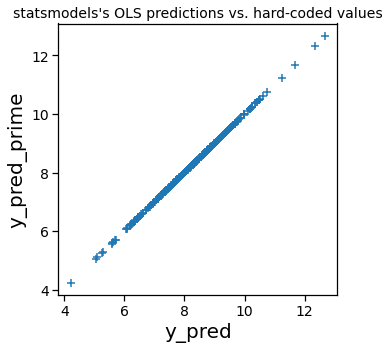

In [49]:
# plt.scatter(y_pred,y_pred_prime.to_numpy().reshape([400,1]));
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_pred,y_pred_prime,marker = '+', s=60)

# plt.scatter(y_pred,y_pred_prime)
plt.title("statsmodels's OLS predictions vs. hard-coded values", fontsize=14)
ax.set_xlabel('y_pred', fontsize=20)
ax.set_ylabel('y_pred_prime', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Great. The output (`y_pred`) from `.predict()` method matches perfectly with the values (`y_pred_prime`) calculated separately using the parameters of the fitted model. The parameters of the model were extracted using the `.params` attribute, i.e., `rModel_results.params`.

We can also compute the correlation between `y_pred_prime` and `y_pred` to show that it's 1 implying a perfect correlation.

In [50]:
np.corrcoef(y_pred_prime, y_pred)[0][1]

1.0

Yes, they show perfect correlation.

(<u>Twisted and Fun Fact</u>:) We can also compute the R-Squared score between `y_pred` and `y_pred_prime` using sklearn's `r2_score()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). If $y^{\prime}_i$ is $i$-th sample of `y_pred_prime` and $y_i$ is the corresponding value of `y_pred` for a total of $n$ samples, then the R-Squared score between `y_pred` and `y_pred_prime` can be estimated as:

\begin{equation}
    R^2(y,y^{\prime}) = 1 - \frac{\sum_{i=1}^{n}(y_i-y^{\prime}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}
\end{equation}

where, $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$. The numerator of the second term, $\sum_{i=1}^{n}(y_i-y^{\prime}_i)^2 = \sum_{i=1}^{n}\epsilon_i^2$, defines the *sum of squares of residuals* of `y_pred_prime` from `y_pred`, while the denominator represents the  *total sum of squares* of `y_pred` which is defined as the sum over all squared differences between $y_i$'s and their overall mean $\bar{y}$. The denominator is proportional to the variance of `y_pred`. **In the best case**, `y_pred_prime` exactly matches `y_pred`, which results in *sum of squares of residuals = 0* and R-Squared score as 1. See the Wikipedia [article](https://en.wikipedia.org/wiki/Coefficient_of_determination) on the Coefficient of determination for more insight.

In [51]:
r2_score(y_pred, y_pred_prime)

1.0

Great! We do get the R-Squared score as 1.

Now, let us consider `y_test` and `y_pred`. They will **not** show a perfect correlation because we have already seen their R-squared score as 0.455, which only explains about 45% of the variation from the actual mean of **training set** of the dependent variable, `fixed.acidity`. Since **training set** is **not** well fit with the linear model, the test set of `fixed.acidity` cannot be expected to be well predicted by the linear model.

Let us first compute the correlation coefficient between `y_test` and `y_pred` followed by their scatter plot.

In [52]:
np.corrcoef(y_test['fixed.acidity'], y_pred)[0][1]

0.6476497388466474

There is a strong positive correlation but it is not 1. This implies that fitted linear model is **not** useless but fails to have any meaningful predictive capability.

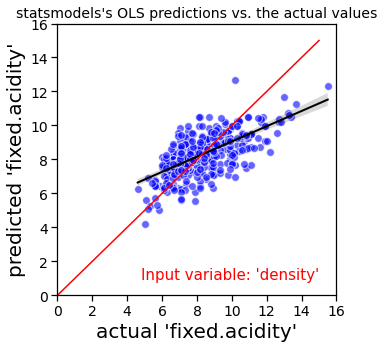

In [53]:
# Plot the predictions
# Build a scatterplot
# Also add the best fit line between y_test and y_pred --> use sns.regplot to achieve both
fig, ax = plt.subplots(figsize=(5, 5))
# plt.scatter(y_test,y_pred,color="blue", alpha = 0.6, edgecolors="white",s=60);
sns.regplot(x=y_test,y=y_pred, scatter_kws = {"color": "blue", "alpha": 0.6, "edgecolors":"white", "s": 60}, line_kws = {"color": "black", "lw":2},ax=ax)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
range_y_test = range(0,round(y_test['fixed.acidity'].max()))
plt.plot([x for x in range_y_test],[x for x in range_y_test], color='red')

label = 'Input variable: \'density\''
ax.annotate(label, xy = (0.3, 0.06), size = 15, xycoords = ax.transAxes, color='red')

# Label it nicely
plt.title("statsmodels's OLS predictions vs. the actual values", fontsize=14)
ax.set_xlabel('actual \'fixed.acidity\'', fontsize=20)
ax.set_ylabel('predicted \'fixed.acidity\'', fontsize=20)
ax.set_xlim(left=0,right =16)
ax.set_ylim(bottom=0,top =16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

While the black line is the best fit line between `y_test` and `y_pred`, the red line in the plot is **not** the best fit line. The red line rather shows a theoretically perfect correlation between our actual and predicted  values - the line that would exist if every prediction was completely correct (in which case, R-squared score will be 1 not 0.455). It's clear that while the points and best fit line (the black line) have a generally similar direction, they don't come close to the red line at all; we still have more work to do. 

To get a better predictive model, we should use more than one variable.

### 3d. Third linear regression model: Multiple linear regression

When we consider more than one explanatory or independent variable in regression analysis, then it is known as ***multiple linear regression***. Refer to Chapter 5 of *AoS* for more details.

Let us then create the test and train datasets. This is again very similar, but now we will 
include all columns from data in the explanatory variables `X` except `fixed.acidity` (dependent variable) and `quality` which is an integer-valued feature (we will show how to include `quality` as an input feature in multiple linear regression in Section 4 by relying on dummy/indicator variables). Remember you do not need to create the dependent variable `y` again since it has already been created earlier in Section 3a and Section 3b-ii after writing the custom function, `sklearn_linear_regression()`, and it's in our workspace. We will use this custom function to automate all our steps.

Since we are now using multiple regressors (i.e., multiple input attributes), we should typically normalize or standardize the data by setting `StandardScaler_flag = 1` in our custom function. This will invoke sklearn's `StandardScaler` [class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardize the date before creating the estimator. This standardizes the regressors or input features, `X`, by removing the mean and scaling to unit variance.

It is a common practice to normalize or standardize the data before training machine learning models on it. This typically helps machine learning algorithms to perform better or converge faster when the different features (variables) are on a smaller scale, i.e., standardization **may** be useful in resolving numerical issues. Standardization of data also makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.

For the red wine dataset, standardization does not, however, make any difference. So, we will not change its value, which is already set as `StandardScaler_flag = 0`.  You can re-run the following code by setting `StandardScaler_flag = 1` to verify it. However, it does not mean that in other cases, it will not help. So, it is always better to use some scaling option (such as sklearn's `StandardScaler` class) depedning on the problem and ML algorithm that are being used.

For the current model of multiple linear regression, we will change the default values of `perfect_corr_line` and `best_fit_line`, and set them as `perfect_corr_line = 1` and `best_fit_line = 1` to include the line for perfect correlation and the best fit line in our plot. We will use the same values for the parameters `StandardScaler_flag = 0`, `test_size = 0.25`, and `random_state = 123`, while choosing a different set of values for the parameters `marker_color` and `plot_title` as appropriate for the current model.

(1599, 10)
(1599, 1)

test_size = 0.25

StandardScaler_flag = 0

R_squared score: 0.8713122295299373



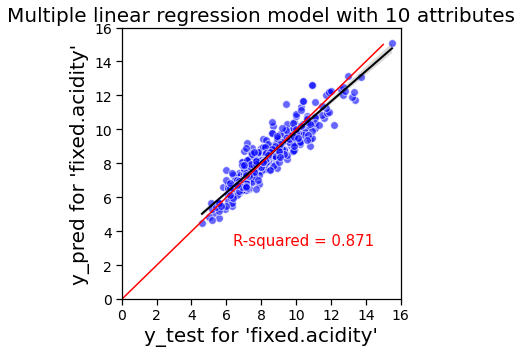

In [54]:
# Include all columns from data in the explanatory variables X except fixed.acidity and quality
X = wine_df.drop(['fixed.acidity', 'quality'], axis=1)

print(X.shape), print(y.shape)

# Remeber that we are going to use sklearn.linear_model.LinearRegression() class 
# which does not need statsmodels's .add_constant() tool. So, comment it out the following
# line.
# Create constants for X, so the model knows its bounds
# X = sm.add_constant(X)

# StandardScaler_flag = 0 # We will scale the data if it is set = 1
marker_color = "blue"
plot_title = f'Multiple linear regression model with {X.shape[1]} attributes'
perfect_corr_line = 1 # Add a line for perfect correlation
best_fit_line = 1 # Also add the best fit line between y_test and y_pred
return_output = 1 # Set to 1 to return output, y_test and y_pred, for further processing

y_test, y_pred = sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title, perfect_corr_line = perfect_corr_line, best_fit_line = best_fit_line, return_output = return_output)

The R-Squared score shows a big improvement - our first model predicted only around 45% of the variation, but now we are predicting 87%!

This helped us to get a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the red line that shows a theoretically perfect correlation between the actual and predicted values.

We can also compute another metric, particularly, the RMSE (Root Mean Squared Error). The mean-squared-error (MSE) is defined by 

\begin{equation}
    MSE = \frac{1}{n}\sum_{i=1}^n\left(y^{(pred)}_i - y^{(test)}_i\right)^2
\end{equation}

Please see the glossary section of *AoS*. The RMSE is just the square root of MSE. This is a measure of the accuracy of a regression model. Very simply put, it's formed by finding the average difference between predictions and actual values.

Let us calculate it by defining a custom function, `RMSE()`, below.

We can also find out the RMSE by using the `sklearn.metrics.mean_squared_error()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) that we already imported as `mean_squared_error` by passing an optional argument `squared=False`.

In [55]:
# Define a function to check the RMSE.
def rmse_func(y_test, y_pred):
    return np.sqrt(((y_pred - y_test) ** 2).mean())

print(f'Using custom RMSE function: {round(rmse_func(y_test, y_pred)[0],4)}')
    
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Using sklearn\'s mean_squared_error() function: {round(rmse,4)}')

Using custom RMSE function: 0.6163
Using sklearn's mean_squared_error() function: 0.6163


The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. The value of about 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away from the correct answer. That's not bad at all because the observed range of fixed acidity is \[4.6, 15.9\].

In [56]:
wine_df['fixed.acidity'].min(), wine_df['fixed.acidity'].max()

(4.6, 15.9)

Let us now put both the actual value of fixed acidity, `y_test`, and the predicted value, `y_pred`, into one dataframe where both the values can be displayed together. We are going to use pandas' multiIndex/advanced indexing [concept](https://pandas.pydata.org/docs/user_guide/advanced.html) to create this new dataframe for a nice presentation.

In [57]:
# Put the predictions & actual values into a dataframe
fixed_acidity_df = pd.DataFrame(y_test)
fixed_acidity_df["predicted"] = y_pred
# fixed_acidity_df.head()

columns = pd.MultiIndex.from_tuples([('fixed.acidity', 'actual'),
                                     ('fixed.acidity', 'predicted')])
fixed_acidity_df = pd.DataFrame(data=fixed_acidity_df.to_numpy(),index=fixed_acidity_df.index,columns=columns)
fixed_acidity_df

fixed.acidity          
            actual predicted
913           10.0  9.737455
773            9.5  8.274734
1038           7.3  7.422148
1107           8.2  8.625453
264            7.9  7.698604
...            ...       ...
1539           6.2  6.827437
825            7.1  8.926141
843           10.6  9.384509
46             4.6  4.465756
1299           5.7  5.482539

[400 rows x 2 columns]

Accessing different columns and rows of dataframe that has multiindex requires careful understanding. Please see this [document](https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d) for further details along with the pandas [documentation](https://pandas.pydata.org/docs/user_guide/advanced.html). We can extract  the `actual` and `predicted` columns and pass them to the `mean_squared_error()` function to re-calculate the RMSE again. This will validate that we correctly constructed the multiindex-based `fixed_acidity_df` with the actual and predicted values.

In [58]:
test_column = fixed_acidity_df.loc[:,('fixed.acidity', ['actual'])]
prediction_column = fixed_acidity_df.loc[:,('fixed.acidity', ['predicted'])]
rmse = mean_squared_error(test_column, prediction_column, squared=False)
print(f'Using sklearn\'s mean_squared_error() function: {rmse}')

Using sklearn's mean_squared_error() function: 0.616319467894885


Nice, the RMSE value matches and everything looks fine!

### 3e. Fourth linear regression model: Multiple linear regression -- attempt to avoid redundancy 

We can also see from our previous heat map that `volatile.acidity` and `pH` are both well correlated with `citric.acid`. See the plots again below. We can make a model that ignores those two variables and just uses `citric.acid`, in an attempt to remove some redundancy from our model.

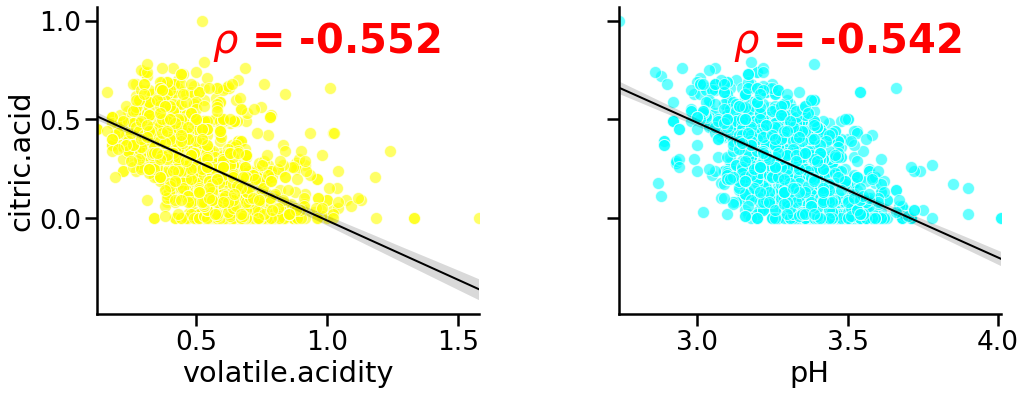

In [59]:
sns.set_context("poster", font_scale=1.2)

x_vars = ["volatile.acidity", "pH"]
y_vars = ["citric.acid"]

g = sns.PairGrid(wine_df, x_vars=x_vars, y_vars=y_vars)
          
color_string =iter(["yellow","cyan"])
g.map(update_regplot)

g.map(corr)
g.fig.set_size_inches(20,12);

We will only change the value of `X` while keeping the other input parameters same. Note that `plot_title` will be automatically adapted to the number of input features used in the current model.

(1599, 8)
(1599, 1)

test_size = 0.25

StandardScaler_flag = 0

R_squared score: 0.7401061678885438



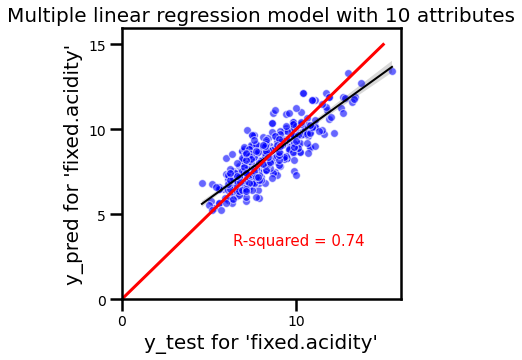

In [60]:
# Drop the columns 'fixed.acidity', 'quality', 'volatile.acidity' and 'pH'
X = wine_df.drop(['fixed.acidity', 'volatile.acidity', 'pH', 'quality'], axis=1)

print(X.shape), print(y.shape)

# Remember that we are going to use sklearn.linear_model.LinearRegression() class 
# which does not need statsmodels's .add_constant() tool. So, comment it out the following
# line.
# Create constants for X, so the model knows its bounds
# X = sm.add_constant(X)

sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title, perfect_corr_line = perfect_corr_line, best_fit_line = best_fit_line)

The R-squared score has now reduced, showing us that actually, the removed features (`volatile.acidity` and `pH`) were important. This can also be seen how the best-fit line (black line) and the line of perfect correlation (red line) deviates more from each other compared to the previous case.

### 3f. Fifth linear regression model: Multiple linear regression -- avoiding *useless* redundancy 

Finally, we can try another model by noting that `free.sulfur.dioxide` and `total.sulfur.dioxide` are also strongly correlated with correlation coefficient value of 0.67. We can check it again. 

In [61]:
np.corrcoef(wine_df['free.sulfur.dioxide'], wine_df['total.sulfur.dioxide'])[0][1]

0.6676664504810218

Note that `free.sulfur.dioxide` and `total.sulfur.dioxide` are not very strongly correlated with `fixed.acidity`. They have values of correlation coefficients of -0.15 and -0.11, respectively, with `fixed.acidity`. Since `total.sulfur.dioxide` is slightly less correlated, let us try dropping this attribute. In addition, we can also drop `chlorides` attribute which does not at all have any significant correlation with `fixed.acidity` (correlation is only 0.094). In fact, `chlorides` does not really have much correlations with any other attributes. For our this fifth model, let us drop both `total.sulfur.dioxide` and `chlorides` to see if we can remove two redundant attributes **without** compromising the predictive power of the linear model.

Like the previous section, we will only change the value of `X` while keeping the other input parameters same.

(1599, 8)
(1599, 1)

test_size = 0.25

StandardScaler_flag = 0

R_squared score: 0.8583113464019826



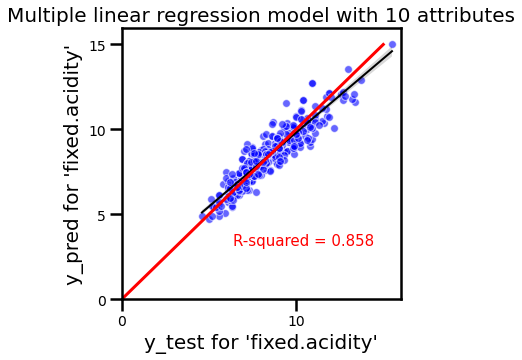

In [62]:
# Drop the column 'total.sulfur.dioxide' and 'chlorides' along with 'fixed.acidity' and  'quality'
X = wine_df.drop(['fixed.acidity', 'chlorides', 'total.sulfur.dioxide', 'quality'], axis=1)

print(X.shape), print(y.shape)

# Remeber that we are going to use sklearn.linear_model.LinearRegression() class 
# which does not need statsmodels's .add_constant() tool. So, comment it out the following
# line.
# Create constants for X, so the model knows its bounds
# X = sm.add_constant(X)

sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title, perfect_corr_line = perfect_corr_line, best_fit_line = best_fit_line)

Great! The R-squared score does reduces but only slightly from about 0.87 to 0.86. So, this model without two insignificant attributes (`total.sulfur.dioxide` and `chlorides`) can be an **alternative** and **acceptable** model for prediction of `fixed.acidity`. The two lines (the best-fit line -- black line, and the line of perfect correlation -- red line) also show significant similarity implying that the two dropped attributes do not contribute in predictions of `fixed.acidity`.

## 4. Multiple linear regression with `quality` as input categorical feature: Prediction of `fixed.acidity`

In this section, we will now also include `quality` in the input data set, `X`, and develop another multiple linear regresssion model to see if the new model improves the prediction accuracy of `fixed.acidity` any further. But, since `quality` is a discrete variable, we will first concert it into a categorical datatype. Coverting `quality` into categorical datatype will help us to cast this feature as a set of dummy/indicator variables, which has values either 0 or 1. We can then consider these dummy/indicator variables, that represent `quality`, in our multiple linear regresssion model.

In [63]:
wine_df['quality'].dtype

dtype('int64')

Let us recall that there are only 6 unique values in our dataset for the `quality` feature even though `quality` can actually take values from discrete set, {0, 1, 2, ..., 10}. We can check it by using pandas' `.unique()` [function](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) for series class. We can also sort these unique values for better presentation by calling the `sorted()` [function](https://docs.python.org/3/howto/sorting.html).

In [64]:
sorted(wine_df["quality"].unique())

[3, 4, 5, 6, 7, 8]

In converting `quality` to the categorical datatype, we will also pass `ordered=True` to maintain orderness of the values. This is, however, not essential in this section, but it will be useful when we will implement statsmodels' `Ordinal Regression` in Section 6b. Refer to [documentation](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html) for syntax about how to use pandas' `CategoricalDtype` class.

In [65]:
cat_type = CategoricalDtype(categories=sorted(wine_df["quality"].unique()), ordered=True)

wine_df['quality']= wine_df.quality.astype(cat_type)
wine_df['quality'].dtype

CategoricalDtype(categories=[3, 4, 5, 6, 7, 8], ordered=True)

In [66]:
wine_df['quality']

1       5
2       5
3       5
4       6
5       5
       ..
1595    5
1596    6
1597    6
1598    5
1599    6
Name: quality, Length: 1599, dtype: category
Categories (6, int64): [3 < 4 < 5 < 6 < 7 < 8]

We will now use pandas' `get_dummies` [class](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to convert the categorical variable, `quality`, into a set of dummy/indicator variables. There are are `k=6` unique values in the `quality` feature, i.e., 3, 4, 5, 6, 7, and 8. So, applying `get_dummies()` on `quality` will yield `k=6` numerical columns of values either 0 or 1. We can include this 6 columns of binary values (i.e., the dummy or indicator variables) in our multiple linear regreession to include the effects of `quality` feature in predicting `fixed.acidity`.

In [67]:
wine_df_dummy = pd.get_dummies(data=wine_df)

Let's display the `wine_df_dummy` dataframe to see how the 6 columns of dummy/indicator variables for `quality` looks like.

In [68]:
wine_df_dummy.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality_3  quality_4  quality_5  quality_6  quality_7  quality_8  
1      9.4          0          0          1          0          0          0  
2      9.8          0          0          1          0          0          0  
3      9.8          0          0          1          0          0          0  
4      9.8          0          0          0          1          0          0  
5      9.4          0          0          1          0          0          0

(1599, 16)
(1599, 1)

test_size = 0.25

StandardScaler_flag = 0

R_squared score: 0.8731327359724298



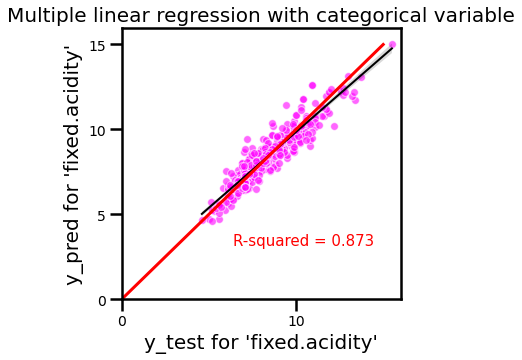

In [69]:
# Include all the 10 features considered in Section 3d and also add the 6
# numerical columns of binary values obtained by applying the `get_dummies` class 
# on `quality`.
X = wine_df_dummy.drop(['fixed.acidity'], axis=1)

print(X.shape), print(y.shape)

marker_color = "magenta"
plot_title = f'Multiple linear regression with categorical variable'

sklearn_linear_regression(X, y, StandardScaler_flag, test_size, random_state, marker_color, plot_title, perfect_corr_line = perfect_corr_line, best_fit_line = best_fit_line)

The R-squared score only improves slightly from 0.871 (with all 10 input features but not including `quality`) in Section 3d to 0.873 here in this section when we included `quality` as an additional input feature. It's only about 0.209% improvement in R-squared score.   This is not surprising because `quality` and the target variable `fixed.acidity` are very weakly correlated (correlation coeffficient ~ 0.12) as we see below.

In [70]:
np.corrcoef(wine_df['fixed.acidity'], wine_df['quality'])[0][1]

0.12405164911322428

## 5. Conclusions so far & Next steps

The most obvious conclusion is the following. Our most predictively powerful model was the *full model* in Section 4 where we included all the 10 attributes as well as `quality` as an input feature (cast through as 6 dummy/indicator variables). The 10 attributes were correlated with one another and this introduced some redundancy in the model. Inclusion of `quality` also did not improve the accuracy significantly. Our most elegant and economical model was the model in Section 3f, where only 8 predictors (as opposed to 16 predictors in the *full model*) were chosen to get a result which was almost as good as the *full model*. The R-squared score of the *full model* was about 0.873, while the model in Section 3f with 8 predictors produced a R-squared score of about 0.858.

Most of our models so far have used sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. In Section 3c, we have used statsmodels' Ordinary Least Squares (OLS) [class](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html) to cross-check some of results of sklearn's linear regression models. Beside classical linear regression analysis, there is a wealth of many other regression algorithms. You can find some examples [here](https://www.statsmodels.org/dev/examples/index.html#regression) implemented by using the `statsmodels` module.

In the following section, we are now going to take a different route and implement a few classification and similar algorithms, where we will consider `quality` as the target variable because the main purpose of the red wine data set is predict `quality` based on other 11 features.

## 6. Multioutput linear regression and Classifications: `quality` as target variable

In this section, we will first define a custom function to automate the process of spiltting the data into train and test set, fitting the **multioutput linear regression** and four ML **classifier models**, scaling the train and test datasets, predicitng `quality` for the test dataset, evaluating a couple of useful metrics (such as fraction of correct predictions and confusion matrix) for evaluation and assessment of the following statistical models:

+ Multioutput linear regression: We will use sklearn's same `LinearRegression`[class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) that we used earlier in Section 3 and Section 4.

+ Ordinal regression: We will use statsmodels' `OrderedModel` [class](https://www.statsmodels.org/devel/generated/statsmodels.miscmodels.ordinal_model.OrderedModel.html). See this Statistics Solutions' [article](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/ordinal-regression/) and Wikipedia [article](https://en.wikipedia.org/wiki/Ordinal_regression) for more details.

+ k-nearest neighbors classifier (k-NN): We will use sklearn's `KNeighborsClassifier` [class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

+ Support vector machines: In particular, we will implement sklearn's `SVC` class, i.e., [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model.

In [71]:
# Define the function
def multioutputLinearRegrAndClassifiers(X, y, estimator_type, model_parameters, StandardScaler_flag, test_size, random_state):
            
    # Split the data using train_test_split()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

    # Check if the unique values of scores of y_test and y_train are exactly same
    uniqueScore_train = np.asarray(sorted(y_train.unique()))
    uniqueScore_test = np.asarray(sorted(y_test.unique()))
#     uniqueScore_test = np.array([1, 2, 3, 4]) # Test raise error block - Outer if block
#     uniqueScore_test = np.array([1, 2, 3, 4, 5, 6]) # Test raise error block - Inner if block
    if len(uniqueScore_test) == len(uniqueScore_train):
        if (uniqueScore_test == uniqueScore_train).mean() != 1:
            raise ValueError("Unique scores of y_train and y_test must be same.")
    else:
        raise ValueError("Numbers of unique scores of y_train and y_test must be same.")
            
            
    if estimator_type == 'Ordinal_Regression':
        # The following is done to avoid warning message from statsmodels when calling 
        # the `.predict()` method of the ordinal regression model for predictions.
        # Statsmodels deprecated the support for multi-dimensional indexing (e.g. `obj[:, None]`)
        # as we do in pd.DataFrame (even if pd.DataFrame is currently accepted). This option
        # will be removed in a future version of statsmodels. It is recommended to convert
        # to a numpy array before indexing instead.
        X_train = X_train.to_numpy()
        X_test = X_test.to_numpy()
    
    if StandardScaler_flag == 1:
        # Scale the training data
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        
        # Scale the test data
        X_test = scaler.transform(X_test)
        
        
    # Create the estimator, fit the data, and make predictions
    if estimator_type == 'MultioutputLinearRegression' or estimator_type == 'Ordinal_Regression':
        
        if estimator_type == 'MultioutputLinearRegression':
            # Create dummy/indicator variables for target variable `quality`
            Y_train = pd.get_dummies(data=y_train)
            
            n_jobs = model_parameters["n_jobs"]
#             print(f'n_jobs:{n_jobs}')

            # Create the model
            dModel = LinearRegression(n_jobs = n_jobs) # dModel = discrete target model
        
            # Fit the data
            dModel.fit(X_train, Y_train)
        
            # Make predictions
            Y_pred = dModel.predict(X_test)
        
        elif estimator_type == 'Ordinal_Regression':
        
            distr = model_parameters["distr"]
        
            # Create the model
            dModel = OrderedModel(y_train, X_train, distr=distr)
        
            # Fit the data
            dModel_results = dModel.fit(method='bfgs', disp=False)
        
            # Print the summary of fitted model
#             print(cModel_results.summary())
        
            # Make predictions
            Y_pred = dModel_results.model.predict(dModel_results.params, exog=X_test)
        
        
        # Convert predictions of numpy array to dataframe
        Y_pred = pd.DataFrame(data=Y_pred,index=y_test.index,columns=uniqueScore_train)
        
        # Convert predictions of matrix of size (n_rows x n_targets) to 
        # an 1-dimensional array of type y_test or y_trian
#         y_pred = (Y_pred.argmax(1)) + (y_train.min())
        y_pred = Y_pred.idxmax(axis=1)
        
    elif estimator_type == 'kNN' or estimator_type == 'SVC':
        if estimator_type == 'kNN':
            n_neighbors = model_parameters["n_neighbors"]
            weights = model_parameters["weights"]
            p = model_parameters["p"]
#             print(f'n_neighbors:{n_neighbors}')
#             print(f'weights:{weights}')
#             print(f'p:{p}')

            # Create the model
            dModel = KNeighborsClassifier(n_neighbors=n_neighbors, weights = weights, p = p)
        
        elif estimator_type == 'SVC':
            gamma = model_parameters["gamma"]
            tol = model_parameters["tol"]
#             print(f'gamma: {gamma}')
#             print(f'tol: {tol}')
            
            # Create the model
            dModel = SVC(gamma=gamma, tol=tol)
        
        # Fit the model to data
        dModel.fit(X_train, y_train)
        
        # Make predictions
        y_pred = dModel.predict(X_test)

    
    # Print if standard scaling is done or not, the test_size, and 
    # the fractions of correct predictions
    print(f'\ntest_size = {test_size}')
    print(f'\nStandardScaler_flag = {StandardScaler_flag}')
    frac_pred = (np.asarray(y_test) == y_pred).mean()
    print(f'\nFraction of correct predictions: {frac_pred}\n')
    
#     # Plot the confusion matrix
#     fig, ax = plt.subplots(figsize=(7, 7))
#     ConfusionMatrixDisplay.from_predictions(y_test, y_pred,ax=ax)
#     plt.show()
    
    return frac_pred, y_test, y_pred

For all the models in this section, the values of a few parameters (in particular, `X`, `y`, `StandardScaler_flag`, `test_size`, and `random_state`) of the above custom function will remain same for the sake of fair comparison. The remaining parameters, namely, `estimator_type` and `model_parameters` will only change depending on what statistical model we are implementing.

In [72]:
# Common input parameters for all the models in this ssection.
X, y = wine_df.drop(['quality'], axis=1), wine_df["quality"]

StandardScaler_flag = 1
test_size = 0.15
random_state = 123

In [73]:
X.shape, y.shape

((1599, 11), (1599,))

### 6a. Multioutput linear regression based on Dummy/Indicator variables

Unlike in Section 3 and Section 4 where there was only 1 real-valued target variable (`fixed.acidity`), we will now have 6 dummy/indicator target variables associated with our new output variable, `quality`, which we had converted earlier into a categorical datatype with 6 unique values. Since `n_targets = 6 > 1`, we will now pass a parameter `n_jobs = 6` while creating the linear regression model. This typically provides speedup in computation for large problems if firstly `n_targets > 1` and secondly the input feature matrix `X` is sparse. See documentation for LinearRegression [class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for more details.

In [74]:
# Other input parameters for multioutput linear regressions
estimator_type = 'MultioutputLinearRegression'

n_targets = len(np.asarray(sorted(y.unique())))
model_parameters = {"n_jobs": n_targets} # The number of jobs to use for the computation speedup

frac_pred_linRegr, y_test_linRegr, y_pred_linRegr = multioutputLinearRegrAndClassifiers(X, y, estimator_type, model_parameters, StandardScaler_flag, test_size, random_state)


test_size = 0.15

StandardScaler_flag = 1

Fraction of correct predictions: 0.6166666666666667



In [75]:
# Create dataframes to store output of fractions of correct predictios
# for later post-processing
data_frac_pred = {'frac_pred':[frac_pred_linRegr]}
  
frac_pred_df = pd.DataFrame(data_frac_pred,index=['linRegr'])
# frac_pred_df

In [76]:
# Let us put the predictions & actual values into a dataframe fror later processing
quality_df = pd.DataFrame(y_test_linRegr)
quality_df["linRegr pred."] = y_pred_linRegr

columns = pd.MultiIndex.from_tuples([('quality', 'actual'),
                                     ('quality', 'linRegr pred.')])
quality_df = pd.DataFrame(data=quality_df.to_numpy(),index=quality_df.index,columns=columns)
# quality_df.head()

### 6b. Ordinal regression

Recall from Section 4 that we already converted the `quality` to categorical type. We also thne passed `ordered=True` to maintain orderness of the values. This will be useful now to implement the Ordinal Regression method in this section. We can check it by displaying `y` to which we assigned `quality` which is now our target variable.

In [77]:
y

1       5
2       5
3       5
4       6
5       5
       ..
1595    5
1596    6
1597    6
1598    5
1599    6
Name: quality, Length: 1599, dtype: category
Categories (6, int64): [3 < 4 < 5 < 6 < 7 < 8]

We will employ two simple ordinal regression algorithms, namely, probit ordinal regression and logit ordinal regression. See this statsmodels' [page](https://www.statsmodels.org/devel/examples/notebooks/generated/ordinal_regression.html) for a few other varieties of ordinal regression scheme. 

In [78]:
# Common input parameters for both 'probit' and 'logit' ordinal regressions
estimator_type = 'Ordinal_Regression'

#### 6b.1. Probit ordinal regression

In [79]:
# Additional input parameters for probit ordinal regression
model_parameters = {"distr": "probit"}

# Call the custom function
frac_pred_probit, y_test_probit, y_pred_probit = multioutputLinearRegrAndClassifiers(X, y, estimator_type, model_parameters, StandardScaler_flag, test_size, random_state)


test_size = 0.15

StandardScaler_flag = 1

Fraction of correct predictions: 0.55



In [80]:
# Print fractions of matching predictions between probit and logit
print(f'\nFraction of matching predictions between linRegr and probit: {(y_pred_probit == y_pred_linRegr).mean()}\n')


Fraction of matching predictions between linRegr and probit: 0.8458333333333333



In [81]:
# Print fractions of matching test data between probit and logit
linRegr_probit_test_frac = (y_test_probit == y_test_linRegr).mean()
print(f'\nFraction of matching test data between linRegr and probit: {linRegr_probit_test_frac}\n')


Fraction of matching test data between linRegr and probit: 1.0



Yes, this should be 1, i.e., 100% since we are working with the same test dataset.

In [82]:
# Append the output dataframe of fractions of correct predictions
data_frac_pred = {'frac_pred':[frac_pred_probit]}
  
df = pd.DataFrame(data_frac_pred,index=['probit'])

frac_pred_df = pd.concat([frac_pred_df, df])
# frac_pred_df

In [83]:
# Append the predictions to the `quality_df`
if linRegr_probit_test_frac == 1.0:
    print('Appending predictions to output and target dataframe')
    quality_df[('quality', 'probit pred.')] = y_pred_probit

# quality_df.head(10)

Appending predictions to output and target dataframe


#### 6b.2. Logit ordinal regression

In [84]:
# Additional input parameters for logit ordinal regression
model_parameters = {"distr": "logit"}

# Call the custom function
frac_pred_logit, y_test_logit, y_pred_logit = multioutputLinearRegrAndClassifiers(X, y, estimator_type, model_parameters, StandardScaler_flag, test_size, random_state)


test_size = 0.15

StandardScaler_flag = 1

Fraction of correct predictions: 0.5541666666666667



In [85]:
# Print fractions of matching predictions between probit and logit
print(f'\nFraction of matching predictions between probit and logit: {(y_pred_logit == y_pred_probit).mean()}\n')


Fraction of matching predictions between probit and logit: 0.9708333333333333



In [86]:
# Print fractions of matching test data between probit and logit
probit_logit_test_frac = (y_test_logit == y_test_probit).mean()
print(f'\nFraction of matching test data between probit and logit: {probit_logit_test_frac}\n')


Fraction of matching test data between probit and logit: 1.0



Yes, this should be 1, i.e., 100% since we are working with the same test dataset.

In [87]:
# Append the output dataframe of fractions of correct predictions
data_frac_pred = {'frac_pred':[frac_pred_logit]}
  
df = pd.DataFrame(data_frac_pred,index=['logit'])

frac_pred_df = pd.concat([frac_pred_df, df])

In [88]:
# Append the predictions to the `quality_df`
if probit_logit_test_frac == 1.0:
    print('Appending prediction to output and target dataframe')
    quality_df[('quality', 'logit pred.')] = y_pred_logit

Appending prediction to output and target dataframe


### 6c. k-nearest neighbors (k-NN) classifier

In implementing the k-NN classifier by using `sklearn.neighbors.KNeighborsClassifier` [class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), we will use the same input data `X` (11 attributes) and the target variable `y` (`quality`) used above for Ordinal Regression. We will also use the same values for the following three arguments: `StandardScaler_flag = 1`, `test_size = 0.25`, and `random_state = 123`. So, these arguments will not be changed.

In [89]:
# Additional input parameters for k-NN
estimator_type = 'kNN'
model_parameters = {"n_neighbors": 15, "weights": "distance", "p": 9.3}

# Call the custom function
frac_pred_kNN, y_test_kNN, y_pred_kNN = multioutputLinearRegrAndClassifiers(X, y, estimator_type, model_parameters, StandardScaler_flag, test_size, random_state)


test_size = 0.15

StandardScaler_flag = 1

Fraction of correct predictions: 0.6791666666666667



In [90]:
# Print fractions of matching predictions between logit and kNN
print(f'\nFraction of matching predictions between logit and kNN: {(y_pred_kNN == y_pred_logit).mean()}\n')


Fraction of matching predictions between logit and kNN: 0.7



In [91]:
# Print fractions of matching test data between logit and kNN
logit_kNN_test_frac = (y_test_kNN == y_test_logit).mean()
print(f'\nFraction of matching test data between logit and kNN: {logit_kNN_test_frac}\n')


Fraction of matching test data between logit and kNN: 1.0



Yes, this should be as usual 1, i.e., 100% since we are working with the same test dataset.

In [92]:
# Append the output dataframe of fractions of correct predictions
data_frac_pred = {'frac_pred':[frac_pred_kNN]}
  
df = pd.DataFrame(data_frac_pred,index=['kNN'])

frac_pred_df = pd.concat([frac_pred_df, df])

In [93]:
# Append the predictions to the `quality_df`
if logit_kNN_test_frac == 1.0:
    print('Appending prediction to output and target dataframe')
    quality_df[('quality', 'kNN pred.')] = y_pred_kNN

Appending prediction to output and target dataframe


### 6d. Support vector machines (SVM): C-Support vector classification

Here, we will use the support vector machines algorithm, in particular, [support vector classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) that has a regularization parameter denoted by `C` in sklearn. This is the reason why it is called C-Support Vector Classification algorithm.

In [94]:
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV

# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# if StandardScaler_flag == 1:
#     grid.fit(X_train_scaled, y_train)
# elif StandardScaler_flag == 0:
#     grid.fit(X_train, y_train)

# print(
#     "The best parameters are %s with a score of %0.2f"
#     % (grid.best_params_, grid.best_score_)
# )

In [95]:
# Additional input parameters for SVM/SVC
estimator_type = 'SVC'
model_parameters = {"gamma": 1e0, "tol": 0.5}

# Call the custom function
frac_pred_SVC, y_test_SVC, y_pred_SVC = multioutputLinearRegrAndClassifiers(X, y, estimator_type, model_parameters, StandardScaler_flag, test_size, random_state)


test_size = 0.15

StandardScaler_flag = 1

Fraction of correct predictions: 0.7083333333333334



In [96]:
# Print fractions of matching predictions between kNN and SVM/SVC
print(f'\nFraction of matching predictions between kNN and SVM: {(y_pred_SVC == y_pred_kNN).mean()}\n')


Fraction of matching predictions between kNN and SVM: 0.8416666666666667



In [97]:
# Print fractions of matching test data between logit and kNN
kNN_SVC_test_frac = (y_test_SVC == y_test_kNN).mean()
print(f'\nFraction of matching test data between logit and kNN: {kNN_SVC_test_frac}\n')


Fraction of matching test data between logit and kNN: 1.0



Great. Test data being used is the same.

In [98]:
# Append the output dataframe of fractions of correct predictions
data_frac_pred = {'frac_pred':[frac_pred_SVC]}
  
df = pd.DataFrame(data_frac_pred,index=['SVM/SVC'])

frac_pred_df = pd.concat([frac_pred_df, df])

In [99]:
# Append the predictions to the `quality_df`
if kNN_SVC_test_frac == 1.0:
    print('Appending prediction to output and target dataframe')
    quality_df[('quality', 'SVM/SVC pred.')] = y_pred_SVC

Appending prediction to output and target dataframe


### 6e. Comparison of results and Remarks

In [100]:
# Print the fraction of predictions matching dataframe
frac_pred_df

frac_pred
linRegr   0.616667
probit    0.550000
logit     0.554167
kNN       0.679167
SVM/SVC   0.708333

In [101]:
# Print the dataframe of target values and predictions from different classifiers
quality_df.sample(n=10, random_state=1)

quality                                                               
      actual linRegr pred. probit pred. logit pred. kNN pred. SVM/SVC pred.
734        5             5            5           5         6             5
776        5             5            5           5         5             5
29         5             5            5           5         5             5
1343       6             6            5           5         6             6
667        6             5            5           5         6             6
264        5             5            5           5         5             5
1182       5             6            6           6         7             7
1162       6             6            6           6         6             6
1264       4             5            5           5         5             5
1483       4             5            5           5         5             6

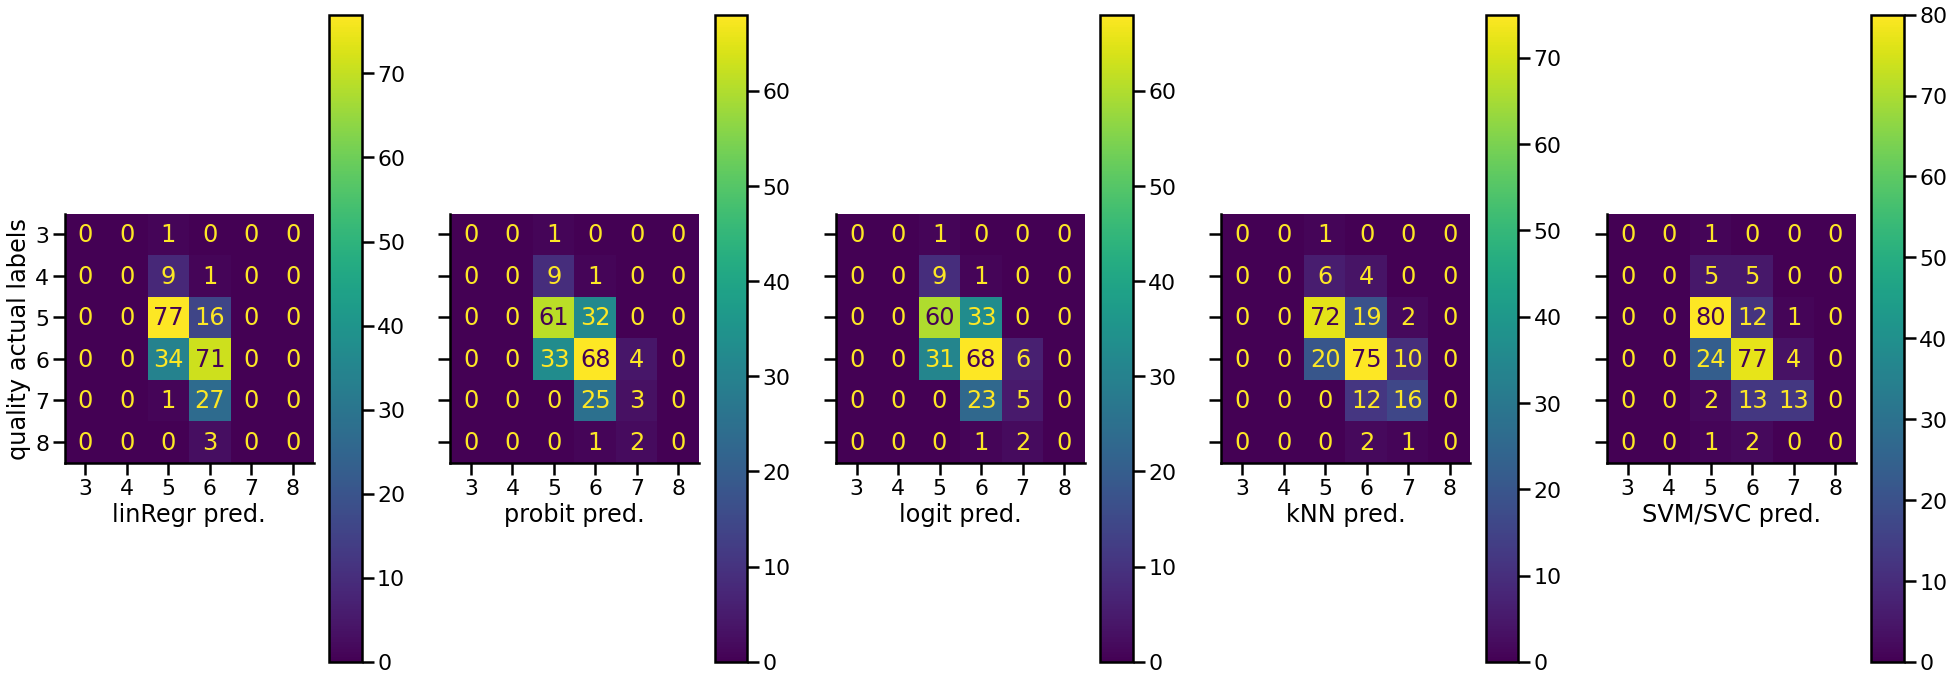

In [102]:
# Let's plot the confusion matrix in a grid for all the classifier models

def confusion_matrix_plot(x, y, **kwargs):
    ax = plt.gca()
    disp = ConfusionMatrixDisplay.from_predictions(y,x,ax=ax)

sns.set_context("poster", font_scale=1)

y_vars = [('quality', 'actual')]
x_vars = [('quality', 'linRegr pred.'), ('quality', 'probit pred.'), ('quality', 'logit pred.'), ('quality', 'kNN pred.'), ('quality', 'SVM/SVC pred.'),]
g = sns.PairGrid(quality_df, x_vars=x_vars, y_vars=y_vars)
g.map(confusion_matrix_plot)

# How to change the xlabels? 
# https://stackoverflow.com/questions/33377243/seaborn-pairgrid-show-axes-labels-for-each-subplot
xlabels = []
for label in range(len(x_vars)):
    xlabel = x_vars[label][1]
    xlabels.append(xlabel)    

for i in range(len(xlabels)):
    g.axes[0,i].xaxis.set_label_text(xlabels[i])

g.axes[0,0].yaxis.set_label_text('quality actual labels')

g.fig.set_size_inches(30,20);

**Remark 1**: Both the k-NN and SVM/SVC predictions are reasonably better than the other models that we implemented. An interesting thing to note that multioutput linear regression results are significantly better than the ordinal regression method for the red wine dataset.

**Remark 2**: The model parameters, particularly, for k-NN classifier in Section 6c and SVC  classifier in Section 6d are possibly not the optimal parameters. They should have been chosen by executing an exhaustive grid search over a set of specified parameter values for each individual estimator. This can be achieved by using sklearn's `GridSearchCV` [class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). A sample example is shown in Section 6d but it was commented out. We have not followed this approach for the sake of time because grid search for optimal parameters is typically very computationally expensive.